In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m

def heat_v(states):
    arr = states
    df = pd.DataFrame(np.nan, index=np.arange(0, 21), columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df = df.fillna(-1)
    z = df.to_numpy()
    ds = pd.DataFrame(arr, columns=['Q', 'T', 'x'])
    h = ds.groupby(['Q', 'T']).mean().reset_index()
    a = h.to_numpy()

    for i in range(31):  # Maximum inventory is 20
        for ii in range(0, 11):  # Maximum time is 5
            for iii in range(len(a)):
                if i == a[iii, 0] and ii == a[iii, 1]:
                    z[int(i), int(ii)] = a[iii, 2]
    sns.heatmap(z, cmap="YlGnBu")
    plt.xlabel('Time')
    plt.ylabel('Inventory') 
    plt.title('Heatmap of the average action per inventory and time step')
    plt.show()

def column_min_max_normalize(matrix, min, max):#, data
    """
    Normalizes a matrix of real numbers between 1 and -1 domain using min-max normalization.
    """
    # Find the minimum and maximum values for each column
    #scaler = pre.MinMaxScaler(feature_range=(-1, 1)).fit(matrix)
    min_vals = min#np.min(matrix, axis=0)#np.min(data)#
    max_vals = max#np.max(matrix, axis=0)#np.max(data)#
    range_vals = max_vals - min_vals
    
    # Perform column-wise min-max normalization
    normalized_matrix = 2 * (matrix - min_vals) / range_vals - 1
    
    if normalized_matrix.shape != ():
        for i in range(normalized_matrix.shape[0]):
            for ii in range(normalized_matrix.shape[1]):
                if normalized_matrix[i,ii] > 1: normalized_matrix[i,ii] = 1
                elif normalized_matrix[i,ii] <-1: normalized_matrix[i,ii] = -1

    return normalized_matrix 

def heatAct(data, min, max):

    n = 101
    #data = mu0qtp
    FILLER = -1
    def heatdn(states, thr1, thr2, h_min, h_max):
        arr = states
        df = pd.DataFrame(np.nan, index=np.arange(-1,n), columns=['1', '2', '3', '4', '5','6','7','8','9','10'])
        df = df.fillna(np.nan)
        z = df.to_numpy()#np.zeros((21,5))
        ds = pd.DataFrame(arr,columns=['Q', 'T', 'p', 'x'])
        ds['p'] = ds['p'].apply(column_min_max_normalize, args=(h_min, h_max))
        h = ds.where(ds['p'] >= thr1).where(ds['p'] <= thr2).groupby(['Q','T','p']).mean().reset_index()
        a = h.to_numpy()
        for i in range(n): #mx 20
            for ii in range(10): #mx 5
                for iii in range(len(a[:])):
                    if i == a[:,0][iii] and ii == a[:,1][iii]:
                        z[int(i),int(ii)] = a[iii,3]
        return z    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 20))

    # Loop through each subplot and generate a heatmap for it
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad((1,1,0.7))
    #ns.heatmap(z, cmap=cmap)
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:

                ax = sns.heatmap(heatdn(data,-0.75  ,-0.5, min,  max), ax=axs[i,j], cmap=cmap)
                ax.set_title('$-1 \leq \\bar{S} \leq -0.5$')#                

            elif i == 0 and j == 1:
                ax =sns.heatmap(heatdn(data,-0.5  ,0, min,  max), ax=axs[i,j],  cmap=cmap)
                ax.set_title('$-0.5 \leq \\bar{S} \leq 0$')#
            elif i == 1 and j == 0:
                ax =sns.heatmap(heatdn(data,0  ,0.5, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0 \leq \\bar{S} \leq 0.5$')#
            else:
                ax =sns.heatmap(heatdn(data,0.5  ,0.75, min,  max), ax=axs[i,j],   cmap=cmap)
                ax.set_title('$0.5 \leq \\bar{S} \leq 1$')#
            #for h in range(len(q)):
            #    rect = plt.Rectangle((h, int(q[h])), 1, 1, fill=None, edgecolor='red', linewidth=1)
            #    ax.add_patch(rect)   
    # Add a main title to the figure
    fig.suptitle('Average $v$ conditioned to Q,T,$\\bar{S}$')

    # Show the figure
    plt.show()
    
def remove_outliers(data):
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(data, 10)
    Q3 = np.percentile(data, 90)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def rewards_per_episode(rew_0, rew_1, rew_sch_0, rew_sch_1):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Time steps to plot
    time_steps_to_plot = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

    # Create figure and subplots
    fig, axs = plt.subplots(2, len(time_steps_to_plot)//2, figsize=(20, 8))

    # Store all data points in lists
    all_rewards_0 = []
    all_rewards_1 = []

    # Plot scatter plots for specified time steps
    for i, time_step in enumerate(time_steps_to_plot):
        row = i // (len(time_steps_to_plot)//2)
        col = i % (len(time_steps_to_plot)//2)
        ax = axs[row, col]

        # Generate a list of colors for each point
        colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
        colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

        # Plot rewards_0 and rewards_1
        for j in range(len(rewards_0)):
            ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
            ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

        # Plot rewards_sch_0 and rewards_sch_1
        for k in range(len(rewards_sch_0)):
            ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
            ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

        ax.set_xlabel('Reward Ag. 1')
        ax.set_ylabel('Reward Ag. 2')
        ax.hlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.vlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
        ax.set_title(f'Scatter Plot episode {time_step}')

        # Store all data points
        all_rewards_0.extend(rewards_0[:, time_step])
        all_rewards_1.extend(rewards_1[:, time_step])

    # Set the same x-axis and y-axis limits for all subplots
    #for ax in axs.flat:
    #    ax.set_xlim(-70, 70)
    #    ax.set_ylim(-70, 70)
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), title='Legend')
    
    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

def rewards_per_episode_1_solo(rew_0, rew_1, rew_sch_0, rew_sch_1, time_step):
    # Load rewards data
    rewards_0 = rew_0
    rewards_1 = rew_1

    # Load rewards_sch data
    rewards_sch_0 = rew_sch_0
    rewards_sch_1 = rew_sch_1

    # Create figure and subplot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate a list of colors for each point
    colors = plt.cm.jet_r(np.linspace(0, 1, len(rewards_0)))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch_0)))  # Different colormap for rewards_sch

    # Plot rewards_0 and rewards_1
    for j in range(len(rewards_0)):
        ax.scatter(rewards_0[j, time_step], rewards_1[j, time_step], color=colors[j], s=300, alpha=1, label=f'time step {j+1}')
        ax.text(rewards_0[j, time_step], rewards_1[j, time_step], str(j+1), ha='center', va='center', fontsize=8, color='white')

    # Plot rewards_sch_0 and rewards_sch_1
    for k in range(len(rewards_sch_0)):
        ax.scatter(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], color=colors_sch[k], s=300, alpha=0.25, label=f'time step Sch. {k+1}')
        ax.text(rewards_sch_0[k, time_step], rewards_sch_1[k, time_step], str(k+1), ha='center', va='center', fontsize=8, color='white')

    ax.set_xlabel('Reward Ag. 1')
    ax.set_ylabel('Reward Ag. 2')
    ax.hlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
    ax.vlines(0, -300, 300, colors='k', linestyles='dashed', alpha=0.5)
    ax.set_title(f'Scatter Plot episode {time_step}')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', title='Legend')

    # Show the plot
    plt.show()

def rewards_per_simulation(re_tot, rewards_sch):

    #rewards_sch_0 = rewards_sch[:, 0]
    #rewards_sch_1 = rewards_sch[:, 1]



    # Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

    colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch[:, 0])))

    for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
        row = simu // 5  # Determine the row index
        col = simu % 5  # Determine the column index
        ax = axs[row, col]
        for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
            # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
            ax.scatter(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                       color=colors[j], s=300, alpha=1, label=f'time step RL {j+1}')
            ax.text(re_tot[simu, 0, j, -1].item(), re_tot[simu, 1, j, -1].item(),
                    str(j), ha='center', va='center', fontsize=8, color='white')


            ax.set_xlabel('Reward Ag. 1')
            ax.set_ylabel('Reward Ag. 2')
            ax.hlines(0, -400, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.vlines(0, -450, 400, colors='k', linestyles='dashed', alpha=0.5)
            ax.set_title(f'Scatter Plot simulation {simu}')


            ax.scatter(rewards_sch[simu, 0, j, -1].item(), rewards_sch[simu, 1, j, -1].item(),
                         color=colors_sch[j], s=300, alpha=0.25, label=f'time step Nash. {j}')
            ax.text(rewards_sch[simu, 0, j, -1].item(), rewards_sch[simu, 1, j, -1].item(),
                    str(j), ha='center', va='center', fontsize=8, color='white')

        # Calculate correlation coefficient
        corr_coef = np.corrcoef(re_tot[simu, 0, :, -1], re_tot[simu, 1, :, -1])[0, 1]
        # Print correlation coefficient below the plot
        #ax.text(0.5, -0.2, f'Correlation Coefficient: {corr_coef:.2f}', ha='center', va='center', transform=ax.transAxes)

    for ax in axs.flat:
        ax.set_xlim(-400,300)
        ax.set_ylim(-450,300)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Legend:')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

def plot_rewards(rewards_file_path, rewards_1_file_path, rewards_2_file_path, rewards_3_file_path, rewards_sch_file_path):
    
    # Load rewards data
    rewards = np.load(rewards_file_path, allow_pickle=True)
    rewards_1 = np.load(rewards_1_file_path, allow_pickle=True)
    rewards_2 = np.load(rewards_2_file_path, allow_pickle=True)
    rewards_3 = np.load(rewards_3_file_path, allow_pickle=True)
    rewards_sch = (np.load(rewards_sch_file_path, allow_pickle=True))#*0+ 1.122
    
    # Create a grid of subplots
    fig, axs = plt.subplots(1, 4, figsize=(15, 3.5))
    i = 1
    # Plot the histograms in each subplot
    axs[0].set_title('$\sigma = 0$')
    axs[0].set_ylim(0, 500)     
    axs[0].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')  
    axs[0].axvline((rewards[:,0].mean(axis=1).mean(axis = 0).mean() + rewards[:,1].mean(axis=1).mean(axis = 0).mean())/2, color='green', linestyle= 'dotted', label = 'average Agents')
    axs[0].axvline(rewards[:,0].mean(axis=0).mean(axis = 1).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')  
    axs[0].axvline(rewards[:,1].mean(axis=0).mean(axis = 1).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')  
    sns.histplot(remove_outliers(rewards[:,0].mean(axis=0).mean(axis = 1)), bins=100, kde=True, ax=axs[0], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards[:,1].mean(axis=0).mean(axis = 1)), bins=100, kde=True, ax=axs[0], label = 'Agent 2')
    #sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[0], label = 'Nash')
    #axs[1].axvline(rewards_1[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1') 
    #axs[1].axvline(rewards_1[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2') 
    #axs[1].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')     
    #axs[1].set_title('$\sigma = 0.0001$')
    #axs[1].set_ylim(0, 500)            
    #sns.histplot(remove_outliers(rewards_1[:,0].mea.n(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 1')
    #sns.histplot(remove_outliers(rewards_1[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 2')
    #sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Nash')
    axs[1].axvline(rewards_1[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')
    axs[1].axvline(rewards_1[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')
    axs[1].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
    axs[1].axvline((rewards_1[:,0].mean(axis=1).mean(axis = 0).mean() + rewards_1[:,1].mean(axis=1).mean(axis = 0).mean())/2, color='green', linestyle= 'dotted', label = 'average Agents')
    axs[1].set_title('$\sigma = 0.0001$')
    axs[1].set_ylim(0, 500)            
    sns.histplot(remove_outliers(rewards_1[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards_1[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Agent 2')
    #sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[1], label = 'Nash')
    axs[2].axvline(rewards_2[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')
    axs[2].axvline(rewards_2[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')
    axs[2].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
    axs[2].axvline((rewards_2[:,0].mean(axis=1).mean(axis = 0).mean() + rewards_2[:,1].mean(axis=1).mean(axis = 0).mean())/2, color='green', linestyle= 'dotted', label = 'average Agents')
    axs[2].set_title('$\sigma = 0.001$')
    axs[2].set_ylim(0, 500)            
    sns.histplot(remove_outliers(rewards_2[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[2], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards_2[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[2], label = 'Agent 2')
    #sns.histplot(remove_outliers(rewards_sch[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True, ax=axs[2], label = 'Nash')
    axs[3].axvline(rewards_3[:,0].mean(axis=1).mean(axis = 0).mean(), color='blue', linestyle= 'dotted', label = 'average Agent 1')
    axs[3].axvline(rewards_3[:,1].mean(axis=1).mean(axis = 0).mean(), color='orange', linestyle= 'dotted', label = 'average Agent 2')
    axs[3].axvline(1.122, color='r', linestyle='dashed', linewidth=1, label='Nash')
    axs[3].axvline((rewards_3[:,0].mean(axis=1).mean(axis = 0).mean() + rewards_3[:,1].mean(axis=1).mean(axis = 0).mean())/2, color='green', linestyle= 'dotted', label = 'average Agents')
    axs[3].set_title('$\sigma = 0.01$')
    axs[3].set_ylim(0, 500)            
    sns.histplot(remove_outliers(rewards_3[:,0].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[3], label = 'Agent 1')
    sns.histplot(remove_outliers(rewards_3[:,1].mean(axis=1).mean(axis = 0)), bins=100, kde=True,   ax=axs[3], label = 'Agent 2')
 # Adjust the spacing between subplots
    plt.tight_layout()

    plt.legend()

    # Show the figure
    plt.show()

    # Print statistics
    print(f'IS mean via rewards for RL agents : {remove_outliers((rewards[:,0]  .mean(axis=1).mean() + rewards[:,1]  .mean(axis=1).mean())/2).item():.2f}, std: {remove_outliers((rewards[:,0]  .mean(axis=1) + rewards[:,1]  .mean(axis=1))).std():.2f}')
    print(f'IS mean via rewards for RL agents : {remove_outliers((rewards_1[:,0].mean(axis=1).mean() + rewards_1[:,1].mean(axis=1).mean())/2).item():.2f}, std: {remove_outliers((rewards_1[:,0].mean(axis=1) + rewards_1[:,1].mean(axis=1))).std():.2f}')
    print(f'IS mean via rewards for RL agents : {remove_outliers((rewards_2[:,0].mean(axis=1).mean() + rewards_2[:,1].mean(axis=1).mean())/2).item():.2f}, std: {remove_outliers((rewards_2[:,0].mean(axis=1) + rewards_2[:,1].mean(axis=1))).std():.2f}')
    print(f'IS mean via rewards for RL agents : {remove_outliers((rewards_3[:,0].mean(axis=1).mean() + rewards_3[:,1].mean(axis=1).mean())/2).item():.2f}, std: {remove_outliers((rewards_3[:,0].mean(axis=1) + rewards_3[:,1].mean(axis=1))).std():.2f}')

def process_data(file_path):
    INV = 100
    azioni = (np.load(file_path, allow_pickle=True))
    
    azionimu0 = azioni[: ,0].mean(axis=0).mean(axis=1)
    q0 = np.zeros(11)
    q0[0] = INV
    for i in range(1, 10):
        q0[i] = q0[i - 1] - azionimu0[i - 1]

    azionimu0qtp = azioni[:, 1].mean(axis=0).mean(axis=1)
    q = np.zeros(11)
    q[0] = INV
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    azioni_tw = np.ones((5_000, 10)) * 2
    twat = azioni_tw.reshape(-1, 10).mean(0)
    twap = np.zeros(11)
    twap[0] = INV
    for i in range(1, 10):
        twap[i] = twap[i - 1] - twat[i - 1]

    T = 10  # Assuming T is defined somewhere in your code
    q_0 = 200  # Assuming q_0 is defined somewhere in your code
    azioni1 = azioni[:, 0].mean(axis=1).mean(axis=0)
    azioni2 = azioni[:, 1].mean(axis=1).mean(axis=0)
    azioni_combined = (azioni1 + azioni2)  #/2
    qt = np.zeros(T + 1)
    qt[0] = q_0
    for i in range(1, T):
        qt[i] = qt[i - 1] - azioni_combined[i - 1]
    
    return q0, q, qt
    

Nash equilibrium for multi agent optimal sell in Almgren and Chriss market impact model
==
$\Sigma(t) = \sum^n_{i=1} X^*_i(t)$

where: 

- n : number of agents
- $X^*_i(t)$ : optimal inventory holding for each agent at time t
- $\Sigma(t)$ : sum of the optimal inventories (total volume traded by the agents)

Closed form nash equilibrium  in this case is:

$$ \Sigma(t) = \frac{n \bar{x}_n}{2\sinh{(\hat{\rho}\,\, T)}} \left(  e^{\hat{\rho}\,\, T}e^{\rho_{-}\,\,t} - e^{-\hat{\rho}\,\, T } e^{\rho_{+}\,\, t}  \right) $$

where:

- $\hat{\rho} = \frac{\sqrt{(n-1)^2\gamma^2 + 4(n+1)\alpha\sigma^2\lambda}} {2(n+1)\lambda}$
- T : number of steps in the time window
- $\rho_{\pm} = - \frac{(n-1)\gamma}{2(n+1)\lambda} \pm \hat{\rho}$
- $\lambda$ : temporary impact
- $\gamma$ : permanent impact
- $\sigma$ : volatility of the asset
- $\alpha$ : risk aversion for CARA utility

Here, theoretically it is assumed that the market model is Almgren-Chriss, thus no buy actions in a selling program.

Networks,
Big Data, and Artificial Intelligence in Economics, Finance, and Social
Sciences"

In [2]:
q_0 = 200
T = 10
gamma = 0.001 # permanent impact k
lambd = 0.002 # temporary impact a
alpha = 1e-9 # risk aversion 
sigma = 0.00001 # volatility 
theta_hat = np.sqrt(gamma**2 + 4*alpha*sigma**2*lambd)/(2*lambd)
rho_hat = np.sqrt(gamma**2+12*alpha*sigma**2*lambd)/(6*lambd)
rho_plus = -gamma/(6*lambd) + rho_hat
rho_minus = -gamma/(6*lambd) - rho_hat
a = [q_0,]
for i in range(1,T+1):
    a.append((q_0 )/(2*m.sinh(rho_hat*T)) * (m.exp(rho_hat * T) * m.exp(rho_minus*i) - m.exp(-rho_hat * T) * m.exp(rho_plus*i)))

x = abs(np.diff(np.asarray(a)))
print(f'Nash equilibrium actions: {x}')

Nash equilibrium actions: [37.85320122 32.04204306 27.12300388 22.95912711 19.43448152 16.45093344
 13.92541451 11.7876089   9.97799551  8.44619085]


We use a DDQL algorithm with two contemporaneusly trading agents. The agents are allowed to buy and sell, but are not allow to short sell or to accumulate more inventory than the one they own at the beginning of the trading period.\\
Parameters:
- $Q_0$ = 100 shares
- $S_t$ = 10 \$
- $\alpha$ = 0.002
- $\kappa$ = 0.001
- Risk aversion = 0
- $N$ = 10

We test for different levels of volatility. We train and test 10 times, each test has 5.000 trading episodes for 10 trading steps.

$\sigma = 0$
===

In [3]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/re_tot.npy'

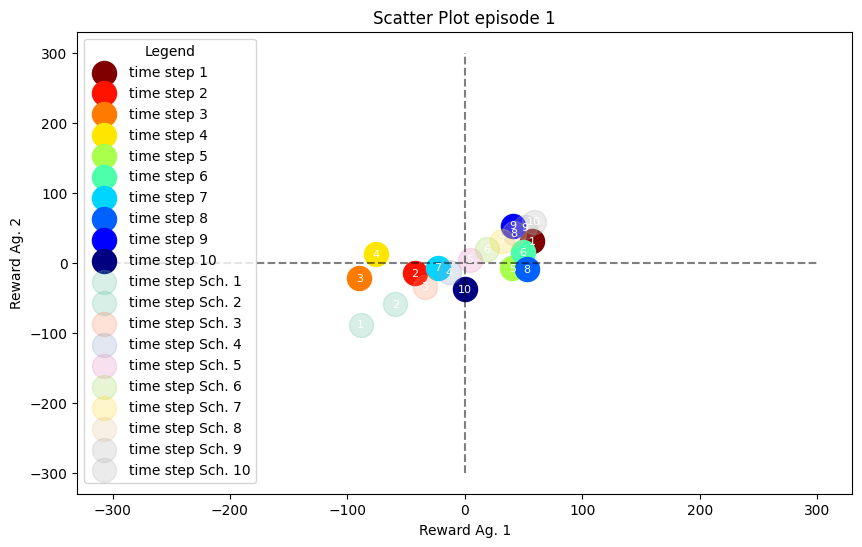

In [ ]:
re_tot = (np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy'))
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:,0].mean(0), re_tot[:,1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)


In [ ]:
plt.scatter(re_tot['arr_0'][0].mean(0), re_tot['arr_0'][1].mean(0))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Extract the data points from re_tot
data_points = re_tot['arr_0'].mean(0)

# Calculate the Pareto efficient frontier
pareto_frontier = []
for i in range(len(data_points)):
    is_efficient = True
    for j in range(len(data_points)):
        if j != i and (data_points[j] >= data_points[i]).all():
            is_efficient = False
            break
    if is_efficient:
        pareto_frontier.append(data_points[i])

# Convert the Pareto frontier to numpy array
pareto_frontier = np.array(pareto_frontier)

# Plot the Pareto efficient frontier
plt.scatter(pareto_frontier[:, 0], pareto_frontier[:, 1])
plt.xlabel('re_tot[\'arr_0\'][0]')
plt.ylabel('re_tot[\'arr_0\'][1]')
plt.title('Pareto Efficient Frontier')
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

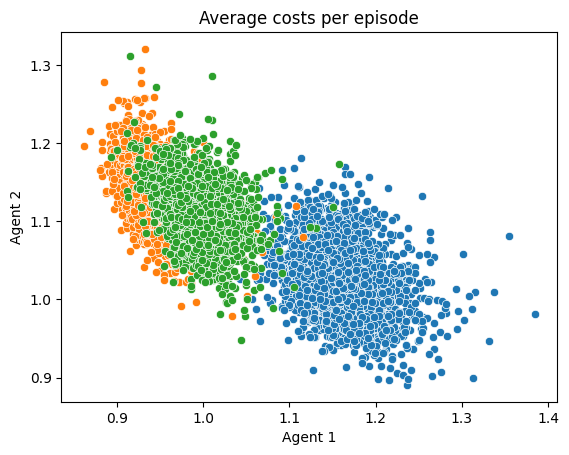

In [ ]:
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
re_tot_al = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy')
re_tot_al1 = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_simile/re_tot.npy')
sns.scatterplot(x=re_tot[:,0].mean(0).mean(0), y=re_tot[:,1].mean(0).mean(0))
sns.scatterplot(x=re_tot_al[:,0].mean(0).mean(0), y=re_tot_al[:,1].mean(0).mean(0))
sns.scatterplot(x=re_tot_al1[:,0].mean(0).mean(0), y=re_tot_al1[:,1].mean(0).mean(0))
plt.xlabel('Agent 1')
plt.ylabel('Agent 2')
plt.title('Average costs per episode')    
plt.show()

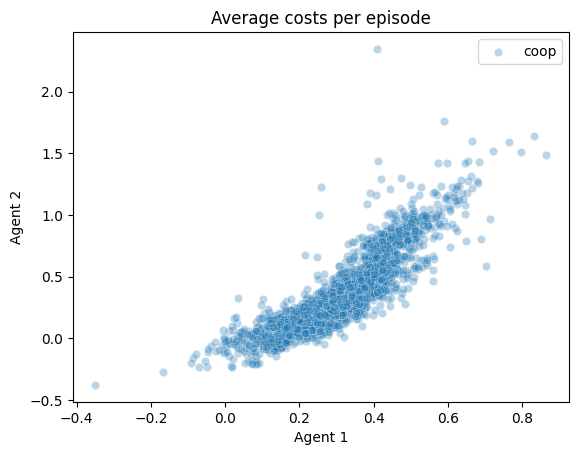

In [5]:
re_tot     = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))
re_tot_al  = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re.npz'))
#re_tot_al1 = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_simile/re.npz'))
#sns.scatterplot(x=re_tot_al['arr_0'][1].mean(0), y=re_tot_al['arr_0'][0].mean(0), label = 'no coop', alpha=0.3)
sns.scatterplot(x=re_tot   ['arr_0'][1].mean(0), y=re_tot   ['arr_0'][0].mean(0), label = 'coop'   , alpha=0.3)

#sns.scatterplot(x=re_tot_al1['arr_0'][1].mean(0).mean(0), y=re_tot_al1['arr_0'][0].mean(0).mean(0))
plt.xlabel('Agent 1')
plt.ylabel('Agent 2')
plt.title('Average costs per episode')    
plt.legend()
plt.show()

In [ ]:
data = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/dati.npz'))['arr_0']

In [ ]:
re_sample = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
re_sample.mean(0).mean(0).mean()

1.1216008708822602

In [ ]:
def make_reward(data, x):

    rew = 100 - (data * x + 0.002 * (x ** 2))

    return rew


reward = np.zeros((2, 2500, data.shape[1]))
#x = np.ones(10)*10
x[-1] = abs(np.diff(np.asarray(a)))
for i in range(data.shape[0]):
    for t in range(data.shape[1]):
        for agent in range(2):
            reward[agent, i, t] = make_reward(data[i,t], x[t])
reward.shape

IndexError: index 2500 is out of bounds for axis 1 with size 2500

In [ ]:
1/reward[1].mean(1), 1/reward[0].mean(1)

(array([0.72677824, 0.72819053, 0.73256513, ..., 0.72987148, 0.73278711,
        0.73811274]),
 array([0.72677824, 0.72819053, 0.73256513, ..., 0.72987148, 0.73278711,
        0.73811274]))

In [ ]:
re_tot_al['arr_0'][1].mean(0).shape, reward[1].mean(1).shape

((2500,), (2500,))

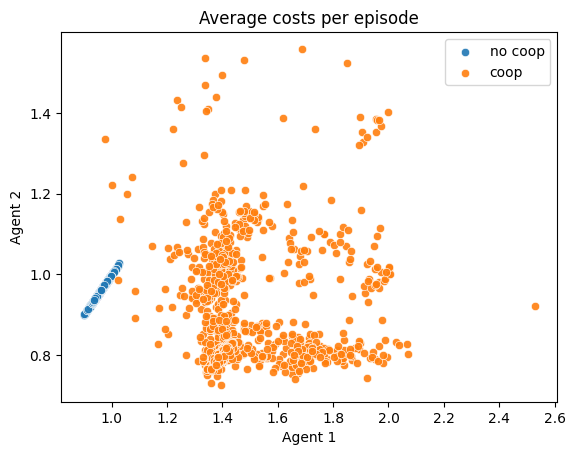

In [ ]:
#re_tot     = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))
re_tot_al  = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))
re_tot_zero = dict(np.load('C:/Users/macri/Desktop/10_zero_vol/re.npz'))
#re_tot_al1 = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/altra_simile/re.npz'))
sns.scatterplot(x=reward[1].mean(1), y=reward[0].mean(1), label = 'no coop', alpha=0.9)
sns.scatterplot(x=re_tot_al['arr_0'][1].mean(0), y=re_tot_al   ['arr_0'][0].mean(0), label = 'coop'   , alpha=0.9)
#sns.scatterplot(x=re_tot_zero['arr_0'][1].mean(0), y=re_tot_zero['arr_0'][0].mean(0), label = 'coop'   , alpha=0.01)
#sns.scatterplot(x=re_tot['arr_0'][1].mean(0), y=re_tot   ['arr_0'][0].mean(0), label = 'coop'   , alpha=0.9)

#sns.scatterplot(x=re_tot_al1['arr_0'][1].mean(0).mean(0), y=re_tot_al1['arr_0'][0].mean(0).mean(0))
plt.xlabel('Agent 1')
plt.ylabel('Agent 2')
plt.title('Average costs per episode')    
plt.legend()
plt.show()

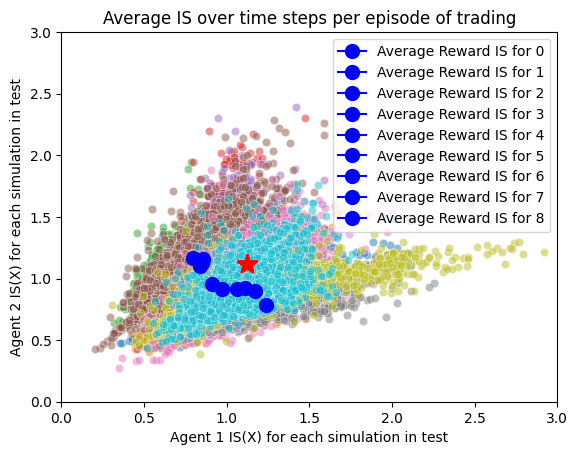

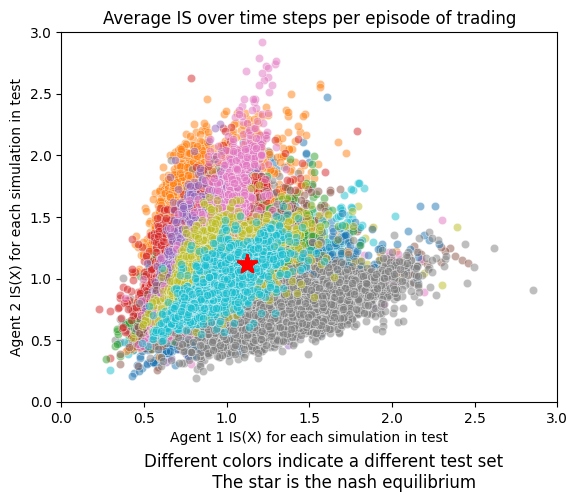

In [10]:
#re_tot     = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))
#re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
#re_tot_2  = (np.load('C:/Users/macri/Desktop/10_zero_vol/old/re_tot.npy'))
#re_tot_zero = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy'))

re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
re_tot_2  = (np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy'))
re_tot_zero = (np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy'))

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()

for i in range(10):
    sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    #sns.scatterplot(x=re_tot_zero[i, 1].mean(0), y=re_tot_zero   [i, 0].mean(0), alpha=0.5)

    plt.plot(re_tot_2[i, 1].mean(0).mean(), re_tot_2[i, 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' )
    plt.plot(nash, nash, marker='*', markersize=15, color='red')
    
    #sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    ##sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    #sns.scatterplot(y=re_tot_al[i, 1].mean(0), x=re_tot_al   [i, 0].mean(0), alpha=0.5)
#plt.plot([2,0], [0, 2], color='red', linestyle='--')
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
#plt.legend()
plt.show()

for i in range(10):
    sns.scatterplot(y=re_tot_2[i, 1].mean(0), x=re_tot_2   [i, 0].mean(0), alpha=0.5)
    plt.plot(nash, nash, marker='*', markersize=15, color='red')
    sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    
#plt.plot([2,0], [0, 2], color='red', linestyle='--')
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
plt.text(0.5, -0.7, 'Different colors indicate a different test set\n \
            The star is the nash equilibrium', fontsize=12)
#plt.legend()
plt.show()

In [ ]:
N = 10
c = 0
v = 0
alf = 0.002
tau = 1/N
alfa  = 0.002 * tau
kappa = 0.001
q_0 = 100
selling = np.array([q_0/N]*N)
selling[0] = q_0
sigma = 0.01
s =  0
mu = 0 
en = 0
for n in selling:
    s += (n)**2
    en += n * 1/tau
c =  0.5 * kappa * q_0**2 + (alfa - 0.5 * kappa * tau) / tau * s #100
c/20

1.0675000000000001

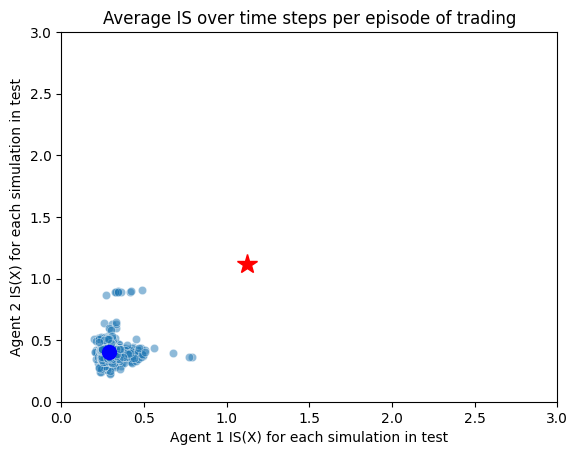

In [27]:
#re_tot     = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))
#re_tot_al  = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy'))
#re_tot_2  = (np.load('C:/Users/macri/Desktop/10_zero_vol/old/re_tot.npy'))
#re_tot_zero = (np.load('C:/Users/macri/Desktop/10_zero_vol/re_tot.npy'))

re_tot_2  = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))

re_sch = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re.npz'))['arr_0']
nash = re_sch.mean(0).mean(0).mean()
 
for i in range(1):
    sns.scatterplot(x=re_tot_2['arr_0'][ 1].mean(0), y=re_tot_2['arr_0'][ 0].mean(0), alpha=0.5)
    plt.plot(re_tot_2['arr_0'][ 1].mean(0).mean(), re_tot_2['arr_0'][ 0].mean(0).mean(), marker='o', markersize=10, color='blue', label = f'Average Reward IS for {i}' )
    plt.plot(nash, nash, marker='*', markersize=15, color='red')
    
    #sns.scatterplot(y=re_tot_zero[i, 1].mean(0), x=re_tot_zero   [i, 0].mean(0), alpha=0.5)
    ##sns.scatterplot(x=re_tot_2[i, 1].mean(0), y=re_tot_2   [i, 0].mean(0), alpha=0.5)
    #sns.scatterplot(y=re_tot_al[i, 1].mean(0), x=re_tot_al   [i, 0].mean(0), alpha=0.5)
#plt.plot([2,0], [0, 2], color='red', linestyle='--')
plt.ylim(0, 3)
plt.xlim(0, 3)

plt.xlabel(r'Agent 1 IS(X) for each simulation in test')
plt.ylabel(r'Agent 2 IS(X) for each simulation in test')
plt.title('Average IS over time steps per episode of trading')    
#plt.legend()
plt.show()

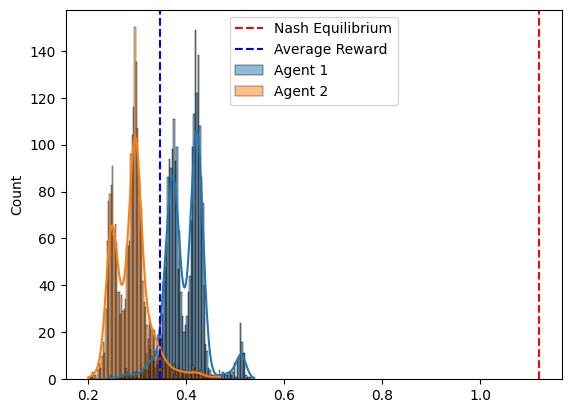

In [26]:
'''Plot dei rewards totali'''
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))['arr_0']
rewards_sch = (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))

sns.histplot(remove_outliers(rewards[0].mean(0)), bins=100, kde=True, label='Agent 1');
sns.histplot(remove_outliers(rewards[1].mean(0)), bins=100, kde=True, label='Agent 2');
plt.axvline(x=1.12, color='r', linestyle='--', label='Nash Equilibrium')
plt.axvline(x=(rewards[0].mean(0).mean() + (rewards[1].mean(0).mean()))/2, color='b', linestyle='--', label='Average Reward')
plt.legend()
plt.show()

In [15]:

# Caricamento dei dati sui reward
rewards = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True))['arr_0']
rewards_sch = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True)

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))  # Modifica le dimensioni secondo necessità

# Plot dell'istogramma con annotazioni
for i, agent_rewards in enumerate(rewards):
    for k in range(len(rewards.shape[1])):
        hist = sns.histplot(remove_outliers(agent_rewards[k].mean(0)), bins=100, kde=True, label=f'Agente {i+1}')
        for rect in hist.patches:
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_height()
            index_start = int(rect.get_x())
            index_end = int(rect.get_x() + rect.get_width())
            plt.text(x, y, f'{index_start}', ha='center', va='bottom')
            plt.text(x, y, f'{index_end}', ha='center', va='top')
    plt.axvline(x=(agent_rewards.mean(0).mean()), color='b', linestyle='--', label='Ricompensa media')
    plt.legend()

# Mostra il plot
plt.show()

TypeError: object of type 'int' has no len()

<Figure size 1000x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import oapackage
#datapoints=np.random.rand(2, 50)
datapoints = np.zeros((2, re_tot[:,0].mean(1).mean(0).shape[0]))#re_tot['arr_0'].reshape(2,-1)#np.random.rand(2, 50)
datapoints[0,:] = re_tot[:,0].mean(1).mean(0)
datapoints[1,:] = re_tot[:,1].mean(1).mean(0)
for ii in range(0, datapoints.shape[1]):
    w=datapoints[:,ii]
    fac=np.linalg.norm(w)
    datapoints[:,ii]=(1/fac)*w

h=plt.scatter(datapoints[0,:], datapoints[1,:])
_=plt.title('The input data', fontsize=15)
plt.xlabel('Objective 1', fontsize=16)
plt.ylabel('Objective 2', fontsize=16)
;
pareto=oapackage.ParetoDoubleLong()

for ii in range(0, datapoints.shape[1]):
    w=oapackage.doubleVector( (datapoints[0,ii], datapoints[1,ii]))
    pareto.addvalue(w, ii)

pareto.show(verbose=1)

lst=pareto.allindices() # the indices of the Pareto optimal designs

optimal_datapoints=datapoints[:,lst]

h = plt.scatter(datapoints[0,:], datapoints[1,:])
hp= plt.scatter(optimal_datapoints[0,:], optimal_datapoints[1,:])
plt.xlabel('Objective 1', fontsize=16)
plt.ylabel('Objective 2', fontsize=16)
plt.xticks([])
plt.yticks([])
_=plt.legend(loc=3, numpoints=1)

plt.show()

NameError: name 're_tot' is not defined

In [ ]:
#datapoints=np.random.rand(2, 50)
datapoints = np.zeros((2, re_tot[:,0].mean(1).shape[0]))#re_tot['arr_0'].reshape(2,-1)#np.random.rand(2, 50)
datapoints[0,:] = re_tot[:,0].mean(1).mean(0)
datapoints[1,:] = re_tot[:,1].mean(1).mean(0)
for ii in range(0, datapoints.shape[1]):
    w=datapoints[:,ii]
    fac=.6+.4*np.linalg.norm(w)
    datapoints[:,ii]=(1/fac)*w

h=plt.scatter(datapoints[0,:], datapoints[1,:])
_=plt.title('The input data', fontsize=15)
plt.xlabel('Objective 1', fontsize=16)
plt.ylabel('Objective 2', fontsize=16)
;
pareto=oapackage.ParetoDoubleLong()

for ii in range(0, datapoints.shape[1]):
    w=oapackage.doubleVector( (datapoints[0,ii], datapoints[1,ii]))
    pareto.addvalue(w, ii)

pareto.show(verbose=1)

lst=pareto.allindices() # the indices of the Pareto optimal designs

optimal_datapoints=datapoints[:,lst]
re_sch = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
schh = np.zeros((2, re_tot[:,0].mean(0).shape[0]))
schh[0,:] = re_sch[:,0].mean(0).mean(0)
schh[1,:] = re_sch[:,1].mean(0).mean(0)


sch = plt.plot(schh[1,:],schh[0,:], )
h = plt.scatter(datapoints[0,:], datapoints[1,:])
hp= plt.scatter(optimal_datapoints[0,:], optimal_datapoints[1,:])
plt.xlabel('Objective 1', fontsize=16)
plt.ylabel('Objective 2', fontsize=16)
plt.xticks([])
plt.yticks([])
_=plt.legend(loc=3, numpoints=1)
###############

ValueError: could not broadcast input array from shape (2500,) into shape (10,)

In [ ]:
datapoints.shape

(2, 2500)

In [227]:
re_tot = dict(np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re.npz', allow_pickle=True))

datapoints = np.zeros((2, re_tot['arr_0'][0].mean(0).shape[0]))#re_tot['arr_0'].reshape(2,-1)#np.random.rand(2, 50)
datapoints.shape


(2, 2500)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pareto: 16 optimal values, 16 objects


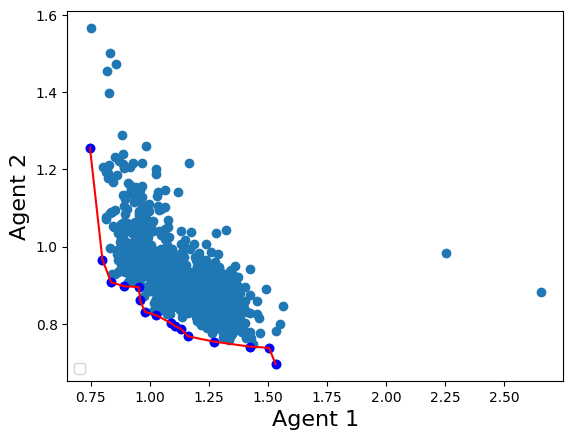

In [228]:
datapoints[0,:] = re_tot['arr_0'][0].mean(0)#flatten()
datapoints[1,:] = re_tot['arr_0'][1].mean(0)#flatten()
#for ii in range(0, datapoints.shape[1]):
#    w=datapoints[:,ii]
#    fac=.6+.4*np.linalg.norm(w)
#    datapoints[:,ii]=w#(1/fac)*w

#h=plt.scatter( datapoints[1,:],datapoints[0,:],)
#_=plt.title('Rewards scatter plot for all the actions done', fontsize=15)
#plt.xlabel('Objective 1', fontsize=16)
#plt.ylabel('Objective 2', fontsize=16)
#;
pareto=oapackage.ParetoDoubleLong()

for ii in range(0, datapoints.shape[1]):
    w=oapackage.doubleVector( (1/datapoints[0,ii], 1/datapoints[1,ii]))
    pareto.addvalue(w, ii)

pareto.show(verbose=1)

lst=pareto.allindices() # the indices of the Pareto optimal designs

optimal_datapoints=datapoints[:,lst]

sorted_indices = np.argsort(optimal_datapoints[1,:])
optimal_datapoints = optimal_datapoints[:, sorted_indices]

# Scatter plot for all datapoints
h = plt.scatter(datapoints[1,:],datapoints[0,:])

# Scatter plot for optimal datapoints
hp= plt.scatter(optimal_datapoints[1,:],optimal_datapoints[0,:], color = 'b')

# Line plot for optimal datapoints
z = plt.plot(optimal_datapoints[1,:], optimal_datapoints[0,:], color='r')

plt.xlabel('Agent 1', fontsize=16)
plt.ylabel('Agent 2', fontsize=16)
plt.xticks()
plt.yticks()
_=plt.legend(loc=3, numpoints=1)

plt.show()

In [ ]:
datapoints[1,:].shape

(25000,)

In [ ]:
re_tot[:,0].mean(0).mean(0).shape

(2500,)

In [ ]:
-2+((re_tot[:,0].mean(axis=1).mean(0)).mean() + (re_tot[:,1].mean(axis=1).mean(0)).mean() )

0.1306517579164952

In [ ]:
#-INV +  data[0] * x - self.a_penalty * (x ** 2)
#200 - (10 * 2 + 0.002 * (2 ** 2))*10

-0.07999999999998408

In [1]:
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re.npz')
sns.histplot((re_tot['arr_0'][0].mean(0)), bins=50, kde=True, label = 'Agent 1')
sns.histplot((re_tot['arr_0'][1].mean(0)), bins=50, kde=True, label = 'Agent 2')
plt.legend()
plt.show()

NameError: name 'np' is not defined

<Axes: ylabel='Count'>

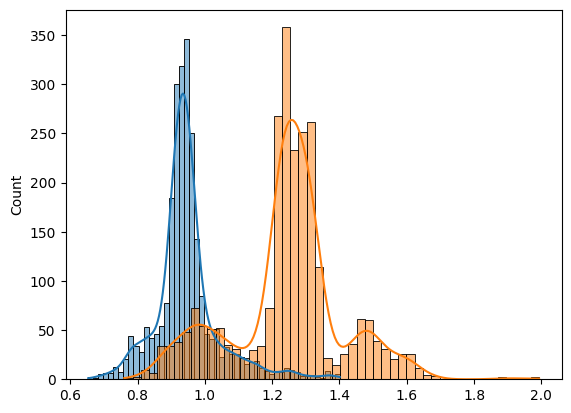

In [ ]:
sns.histplot(remove_outliers(re_tot['arr_0'][0].mean(0)), bins=50, kde=True)
sns.histplot(remove_outliers(re_tot['arr_0'][1].mean(0)), bins=50, kde=True)

In [ ]:
if np.random.binomial(1, 0.5, 1)[0] ==0:
    age =[0,1]
else:
    age = [1,0]


for i in age:
    print(i)

1
0


NameError: name 'a' is not defined

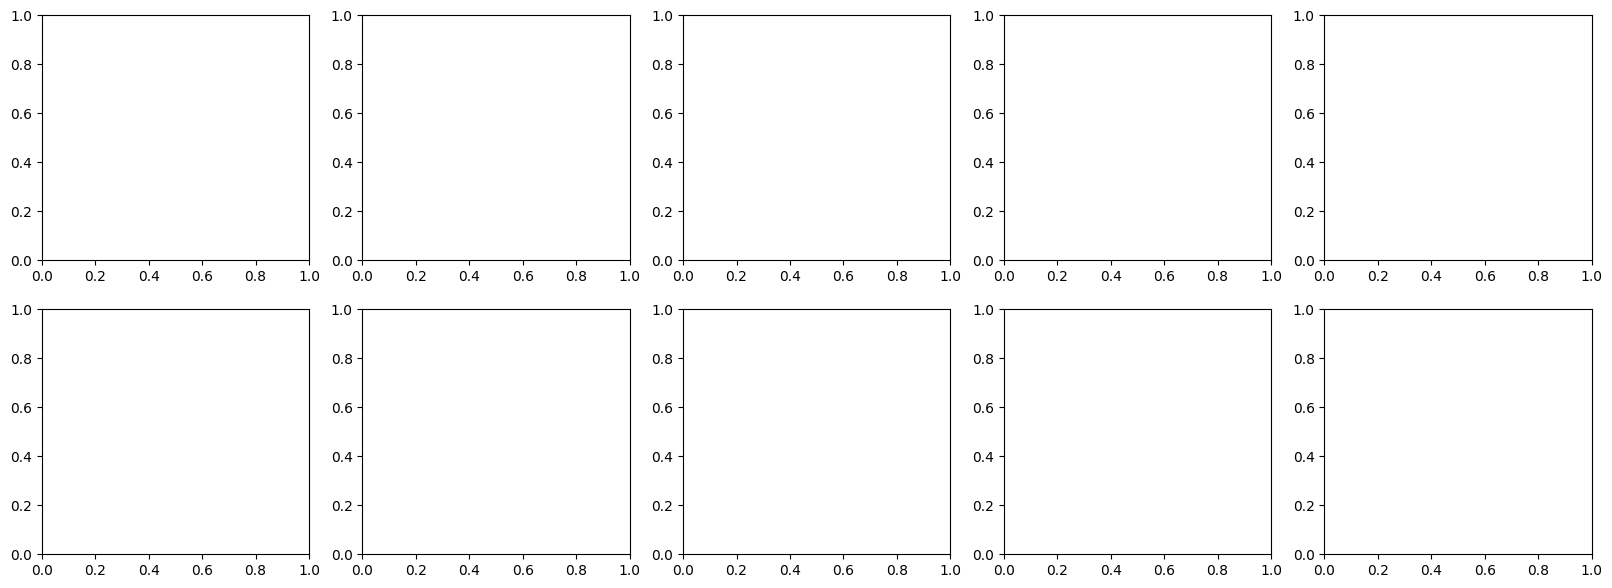

In [5]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/ennesima/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/ennesima/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

In [21]:
def process_data(file_path):
    INV = 100
    azioni = dict(np.load(file_path, allow_pickle=True))['arr_0']
    
    azionimu0 = azioni[0].mean(axis=1)
    q0 = np.zeros(11)
    q0[0] = INV
    for i in range(1, 10):
        q0[i] = q0[i - 1] - azionimu0[i - 1]

    azionimu0qtp = azioni[1].mean(axis=1)
    q = np.zeros(11)
    q[0] = INV
    for i in range(1, 10):
        q[i] = q[i - 1] - azionimu0qtp[i - 1]

    azioni_tw = np.ones((5_000, 10)) * 10
    twat = azioni_tw.reshape(-1, 10).mean(0)
    twap = np.zeros(11)
    twap[0] = INV
    for i in range(1, 10):
        twap[i] = twap[i - 1] - twat[i - 1]

    T = 10  # Assuming T is defined somewhere in your code
    q_0 = 100  # Assuming q_0 is defined somewhere in your code
    azioni1 = azioni[ 0].mean(axis=1)
    azioni2 = azioni[ 1].mean(axis=1)
    azioni_combined = (azioni1 + azioni2)  #/2
    qt = np.zeros(T + 1)
    qt[0] = q_0
    for i in range(1, T):
        qt[i] = qt[i - 1] - azioni_combined[i - 1]
    
    return q0, q, qt, twap

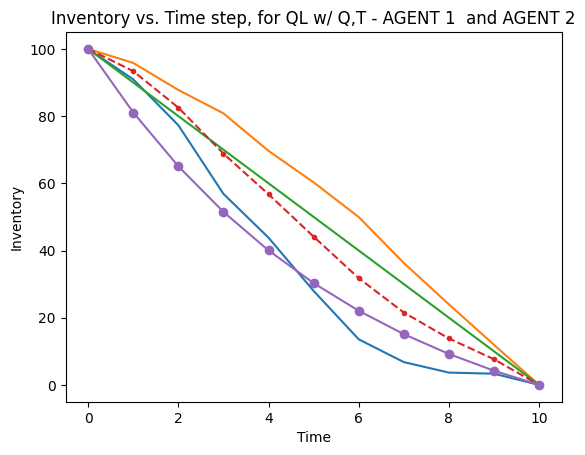

In [25]:
'''Selling schedule media'''
agente_0, agente_1, agente_medio, twap = process_data('C:/Users/macri/Desktop/ennesima/azioni.npz')

plt.plot(agente_0)
plt.plot(agente_1)
plt.plot(twap)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

In [ ]:
b

array([[[[ 4.49526610e+00,  1.55000000e+01,  1.55000000e+01, ...,
           1.55000000e+01,  0.00000000e+00,  2.28818904e+00],
         [ 6.31754735e+00,  8.09277397e+00,  2.95000000e+01, ...,
           1.93543859e+00,  4.99342331e+00,  1.35000000e+01],
         [ 5.81689714e+00,  3.91243261e+00,  0.00000000e+00, ...,
           2.05000000e+01,  1.35000000e+01,  1.85000000e+01],
         ...,
         [ 3.55750805e+00,  6.25001293e-02,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 3.12900557e+00,  0.00000000e+00, -1.26352769e+00, ...,
           0.00000000e+00,  0.00000000e+00,  8.39230318e-02],
         [ 1.99054877e+00,  4.44018908e-02,  4.20455715e+00, ...,
           9.17677850e+00,  1.08705409e+00,  3.81053922e-02]],

        [[ 1.77481789e+00,  5.26237557e+00,  5.35498718e-03, ...,
           1.70000000e+01,  1.70000000e+01,  6.96596478e+00],
         [ 1.30000000e+01,  6.42625067e+00,  5.46794316e+00, ...,
           6.87013469e

In [ ]:
a = np.load('C:/Users/macri/Desktop/10_zero_vol/azioni_tot.npy')
a[:, 0].mean(axis=0).mean(axis=1)

array([ 8.10324855, 15.17694939, 13.89391164, 11.01224437,  8.57701302,
        5.92181364,  6.40675335, 10.15155531,  6.58989312, 14.16661759])

$\sigma = 0.0001$
===

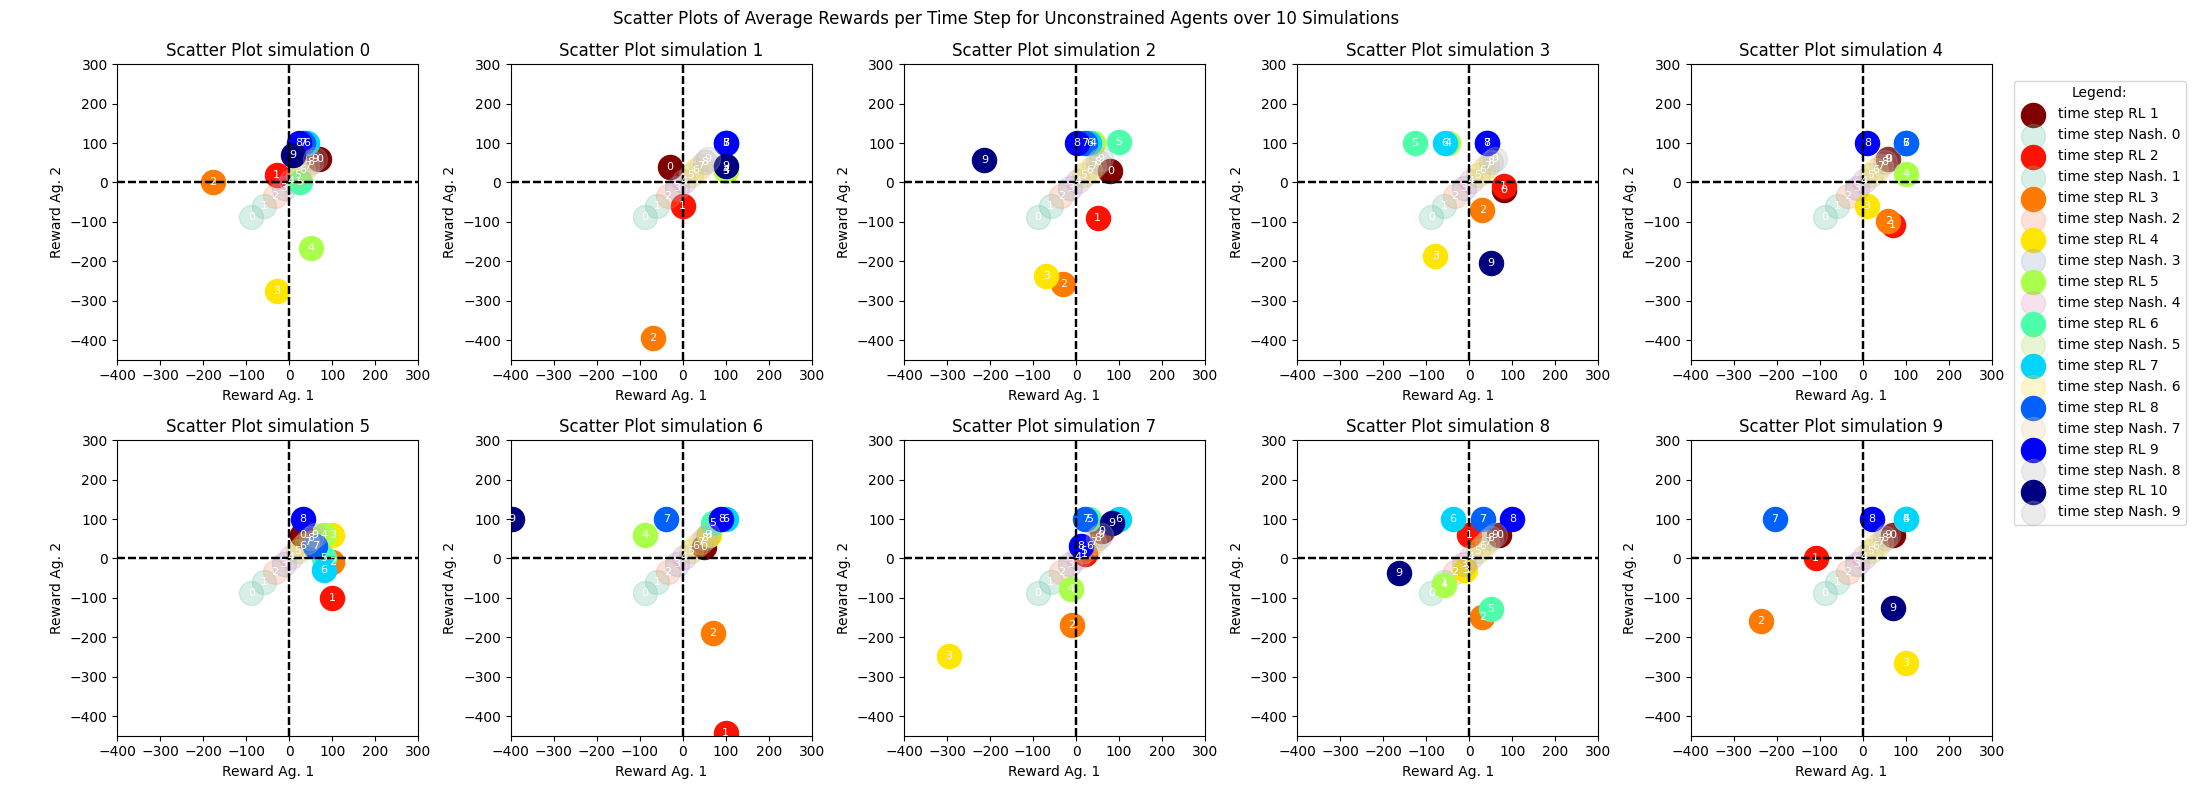

In [ ]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

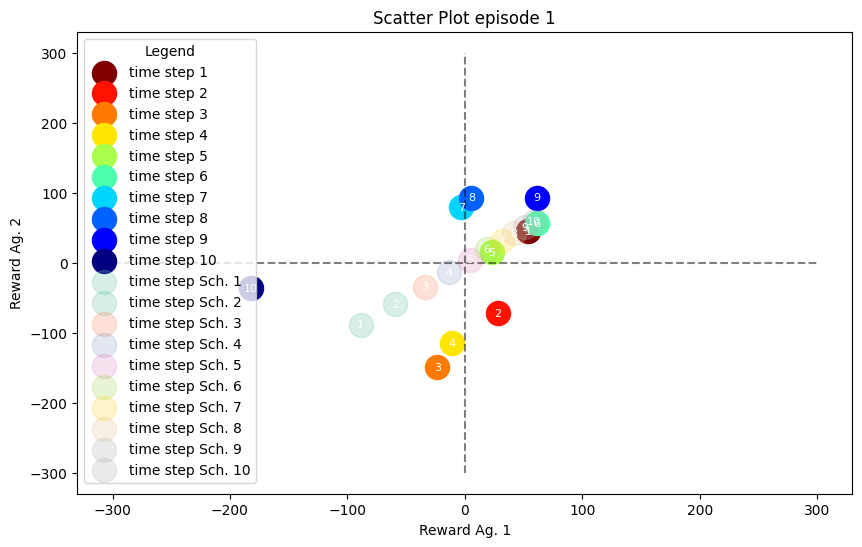

In [ ]:
re_tot = np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:, 0].mean(0), re_tot[:, 1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)

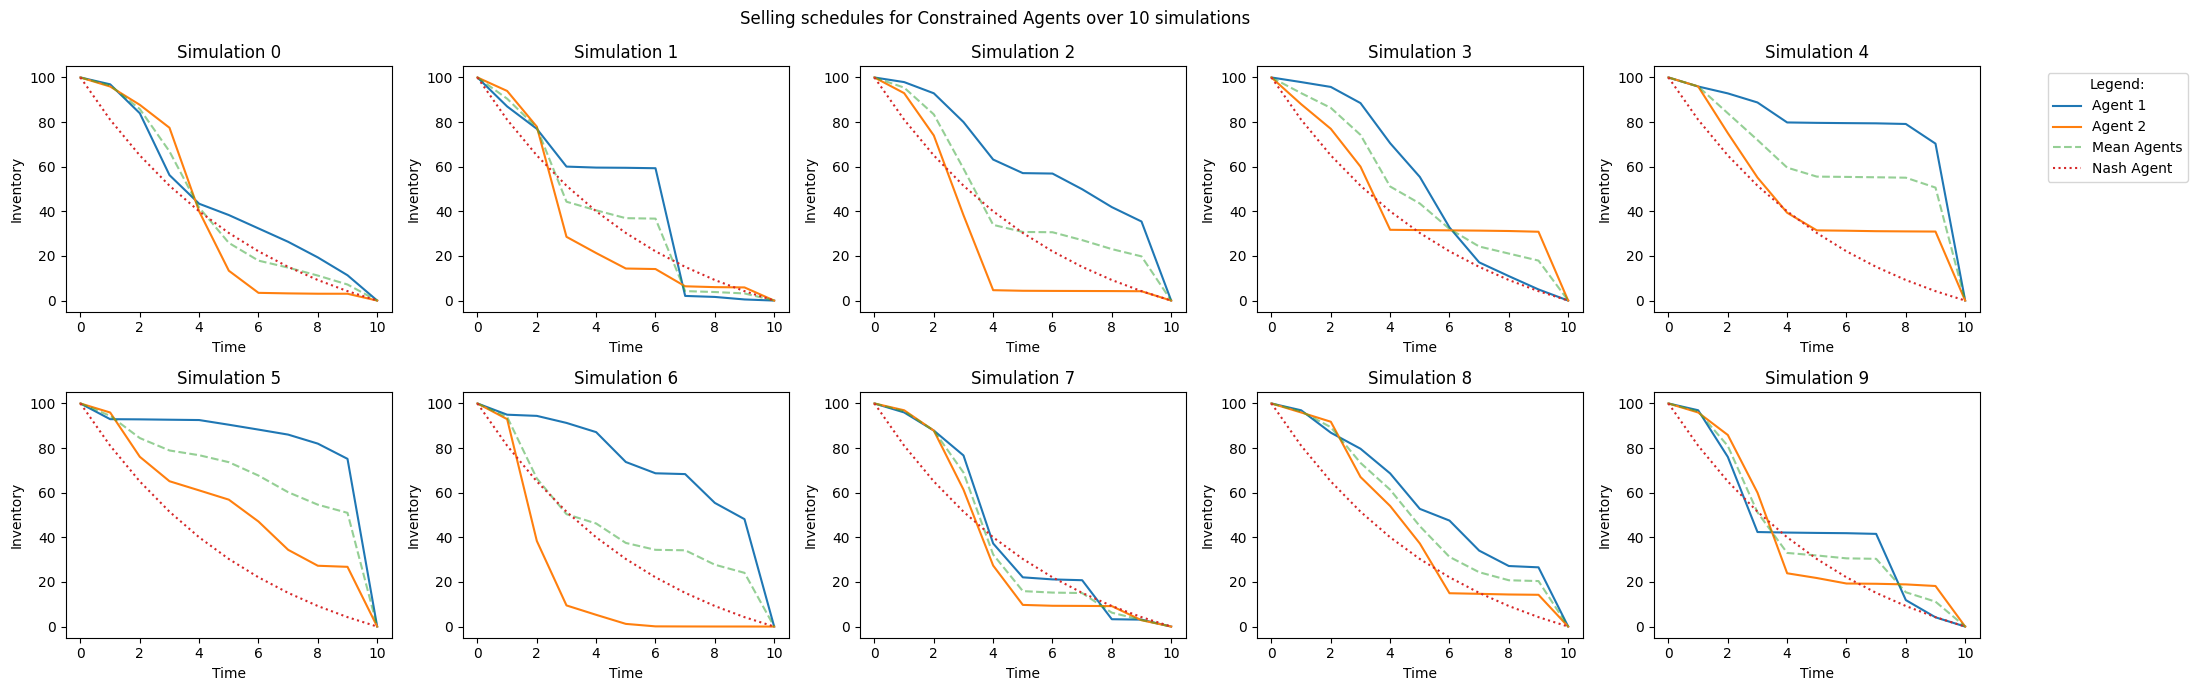

In [9]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

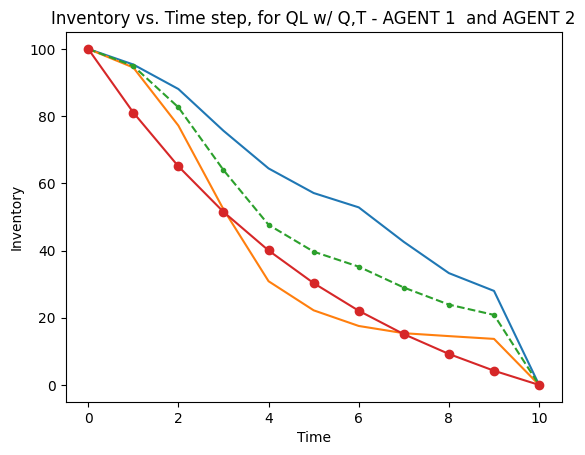

In [ ]:
'''Average selling schedule'''
agente_0, agente_1, agente_medio = process_data('C:/Users/macri/Desktop/10_bassa_vol_0_0001/azioni_tot.npy')

plt.plot(agente_0)
plt.plot(agente_1)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

$\sigma=0.0001$
===


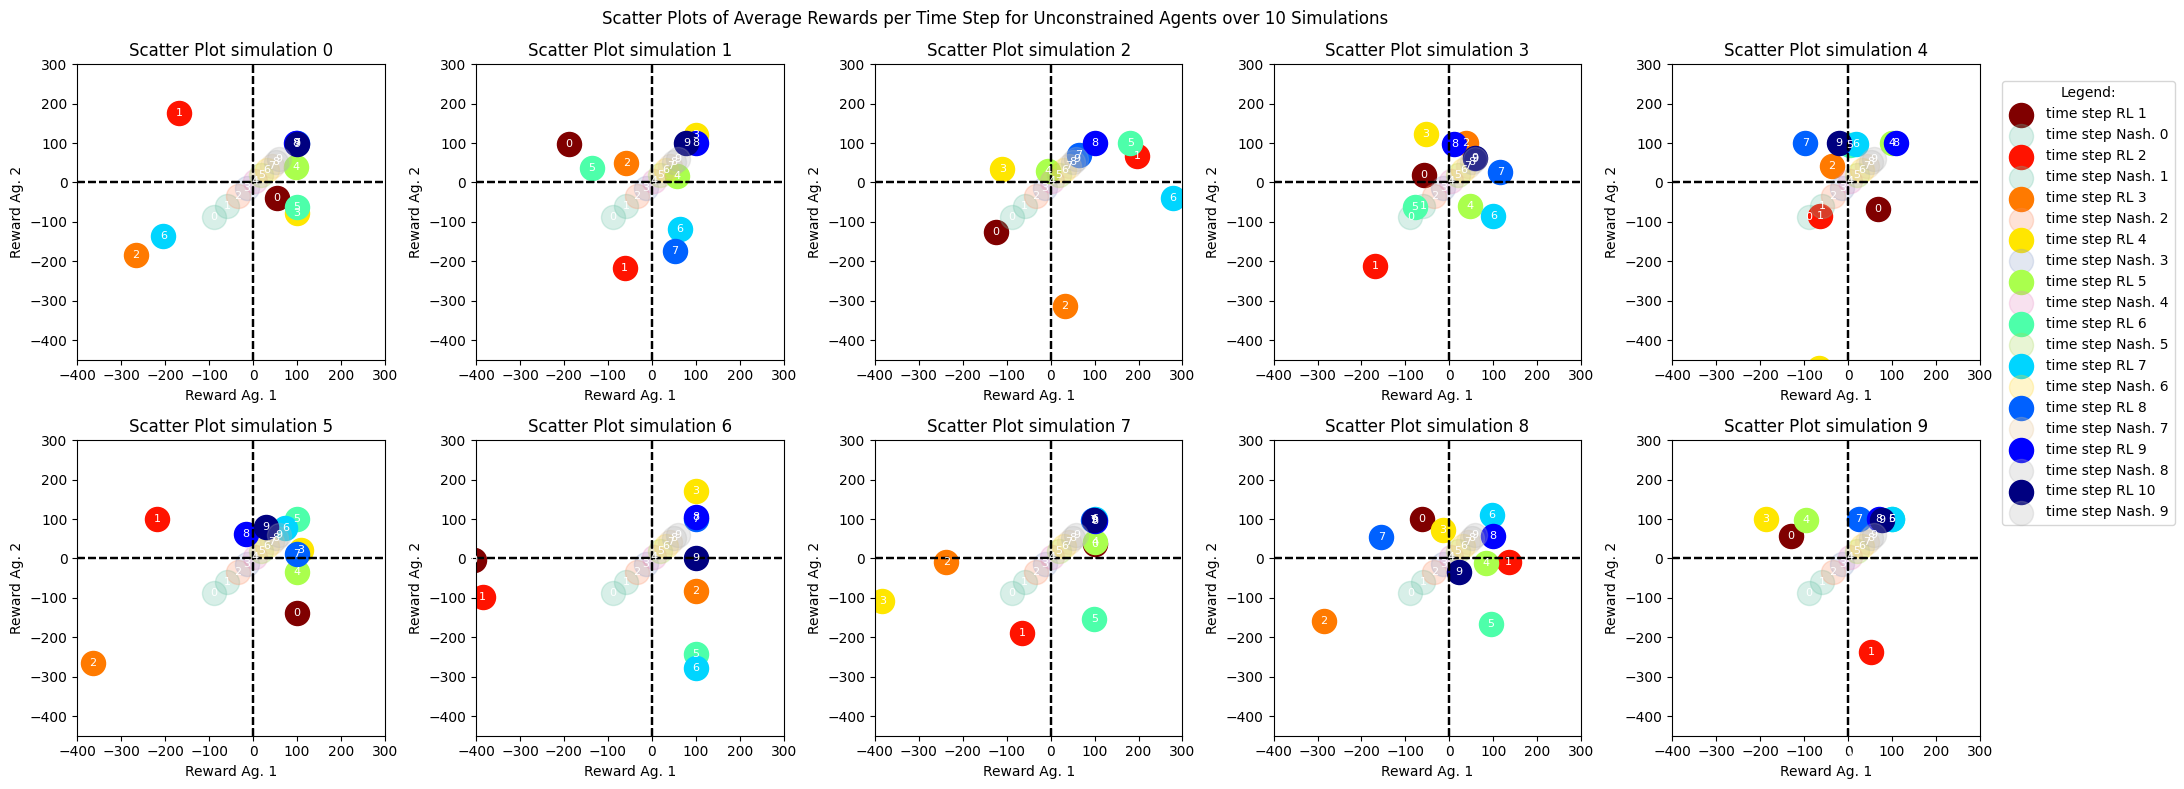

In [ ]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

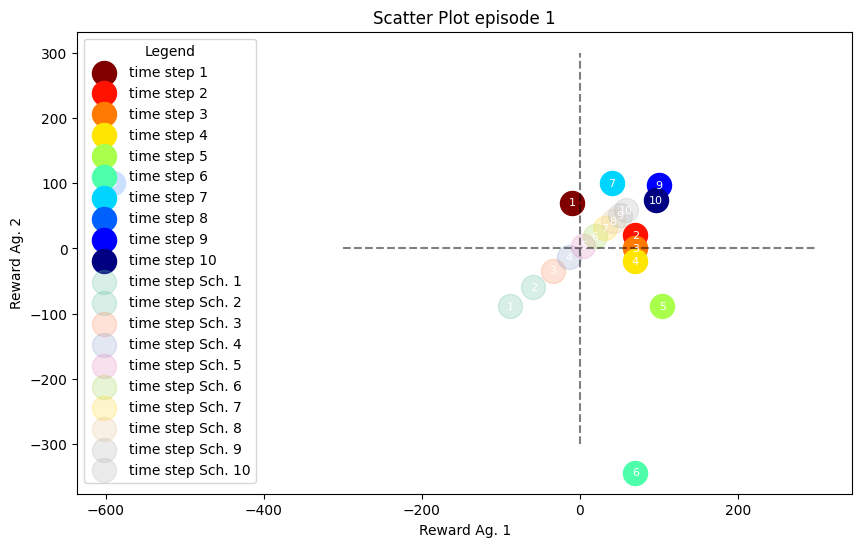

In [150]:
re_tot = dict(np.load('C:/Users/macri/Desktop/ennesima/re.npz'))['arr_0']
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[0], re_tot[1], rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)

In [ ]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/ennesima/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/ennesima/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/azioni_tot.npy'

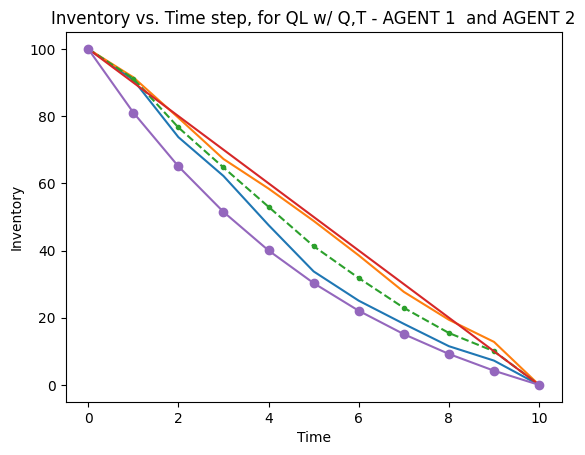

In [ ]:
'''Average selling schedule'''
agente_0, agente_1, agente_medio = process_data('C:/Users/macri/Desktop/ennesima/azioni_tot.npy')


azioni_tw = np.ones((5_000,10)) * 10
twat = azioni_tw.reshape(-1,10).mean(0)
twap = np.zeros(11) 
twap[0] = 100
for i in range(1,10):
    twap[i] =  twap[i - 1] - twat[i - 1]

plt.plot(agente_0)
plt.plot(agente_1)
plt.plot((agente_0 +agente_1)/2, '.--')
plt.plot(twap)
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

$\sigma = 0.001$
===

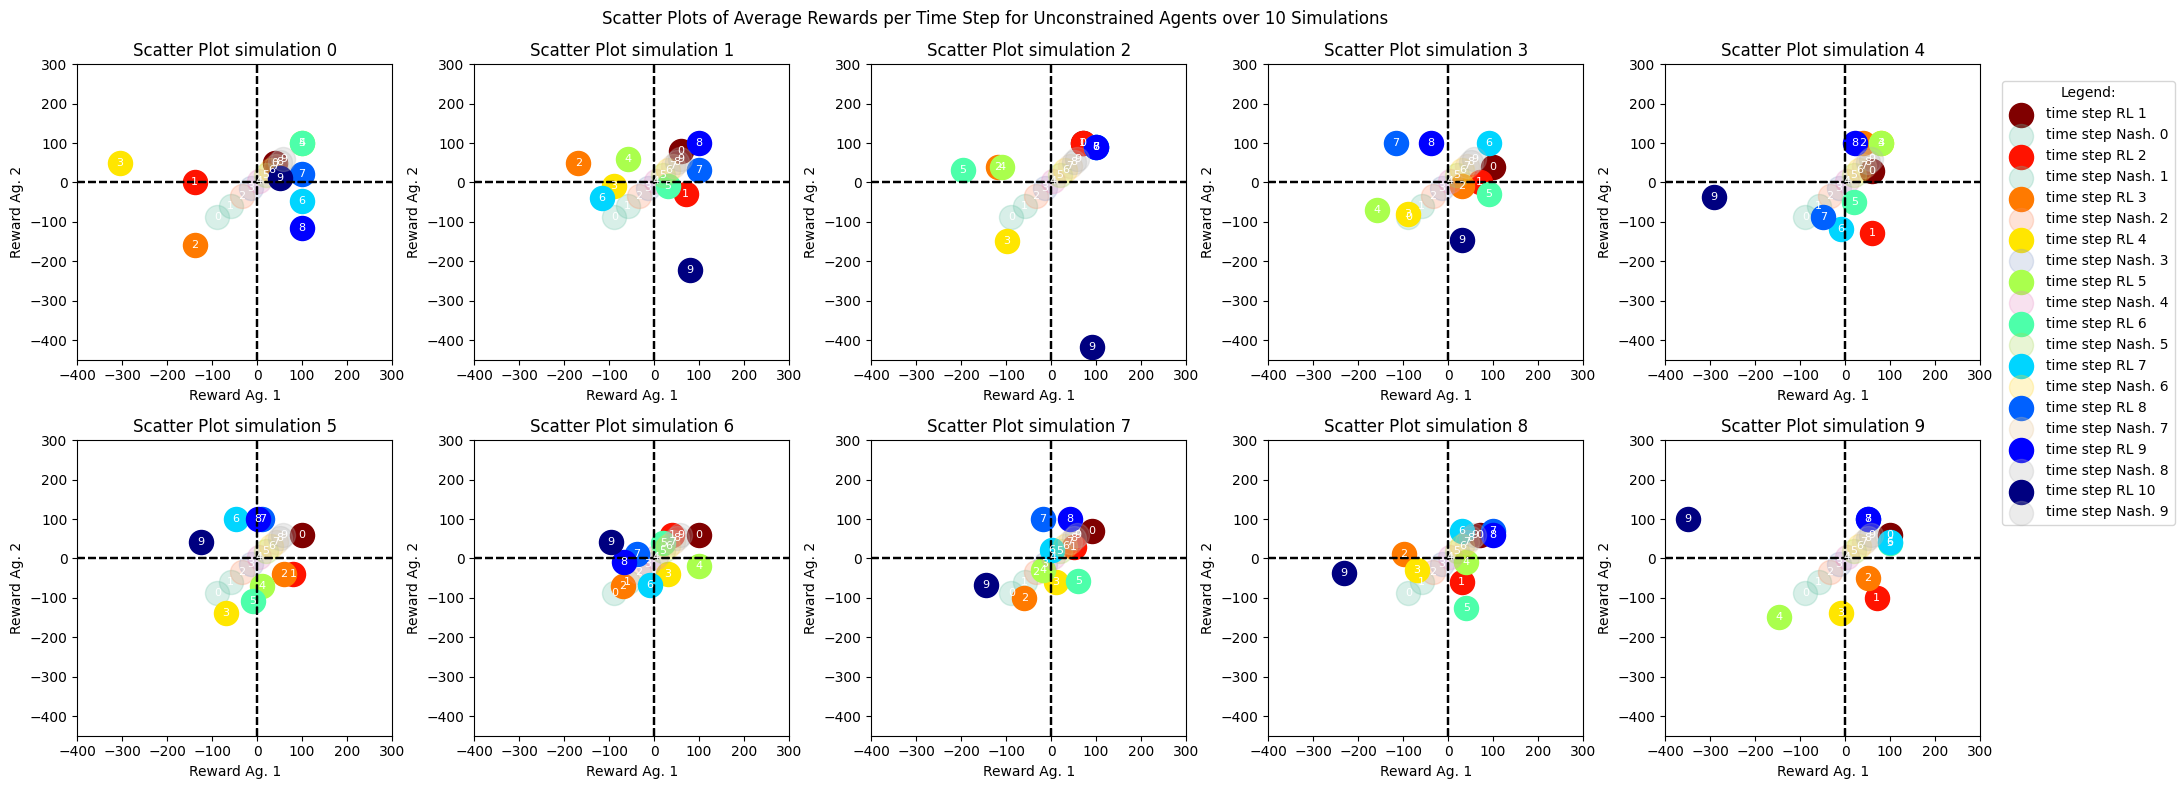

In [ ]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

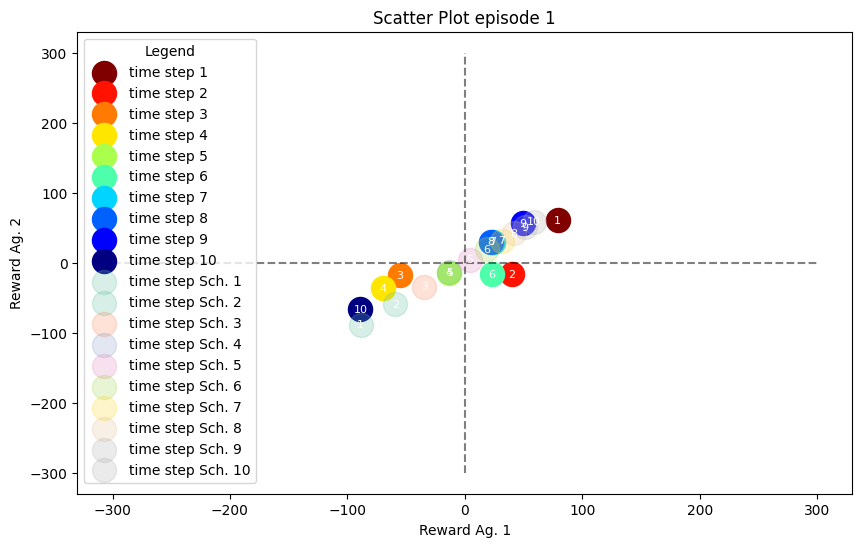

In [ ]:
re_tot = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:, 0].mean(0), re_tot[:, 1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)

In [1]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/10_media_vol_0_001/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [ ]:
'''Average selling schedule'''
agente_0, agente_1, agente_medio = process_data('C:/Users/macri/Desktop/ennesima/azioni_tot.npy')

plt.plot(agente_0)
plt.plot(agente_1)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

$\sigma = 0.01$
===

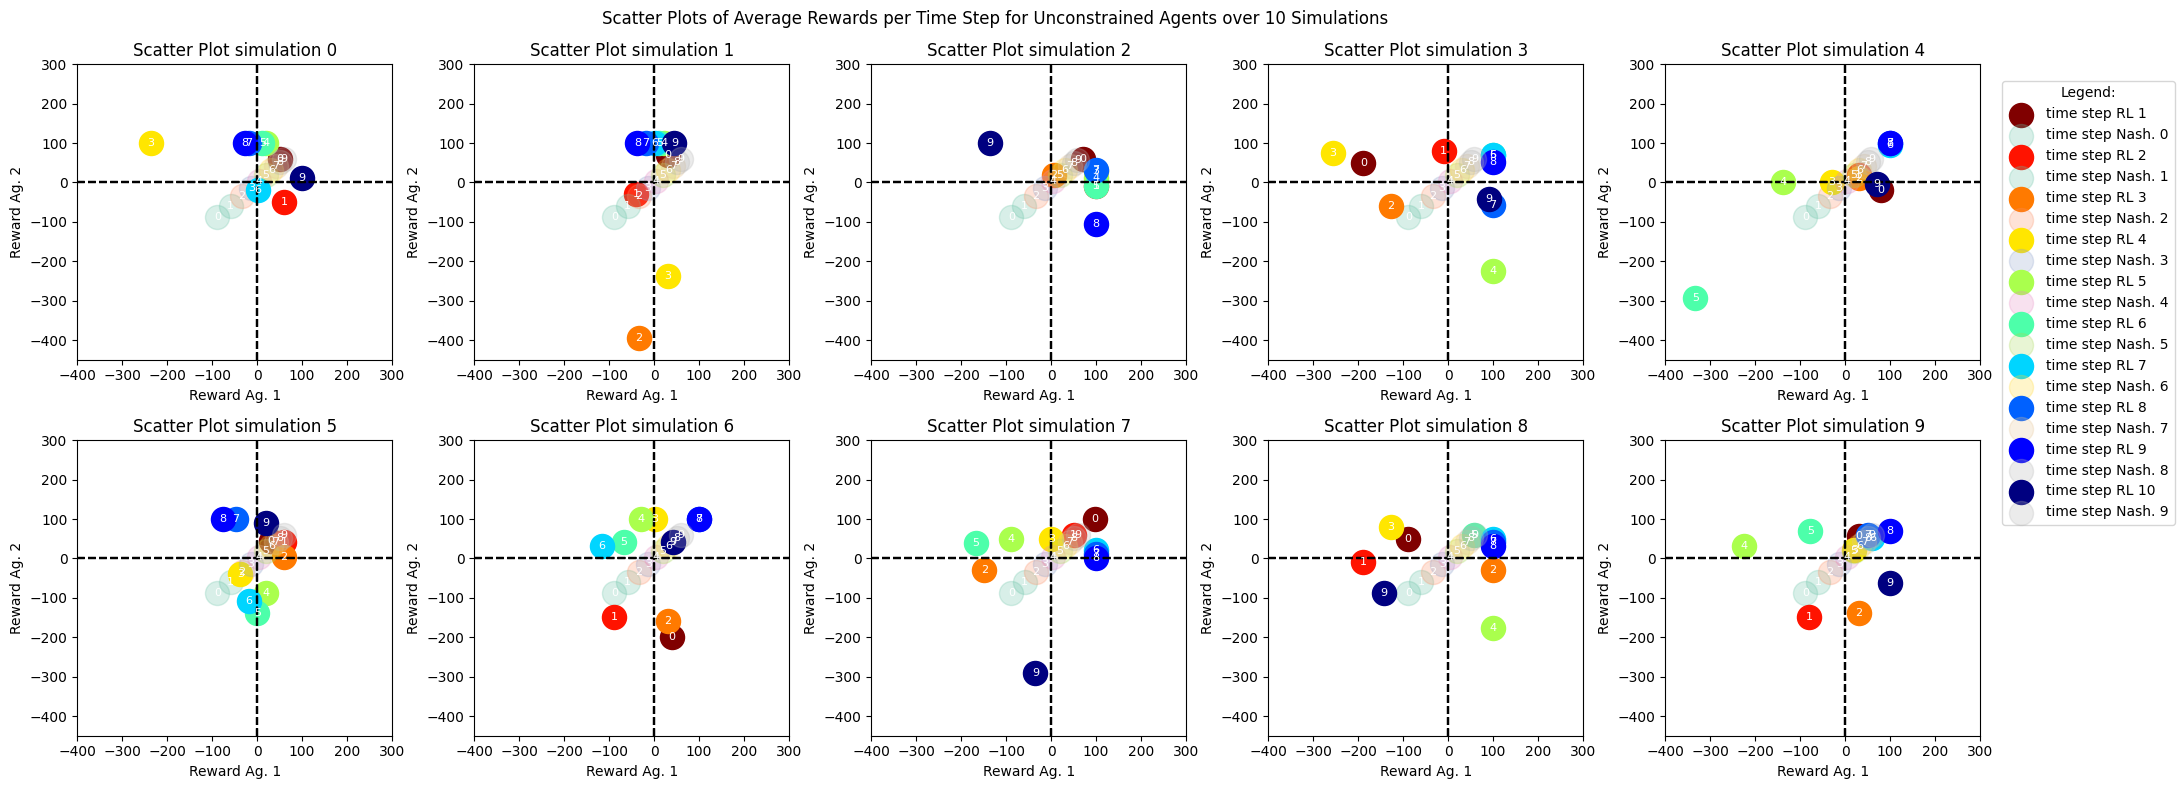

In [ ]:
'''Rewards scatter plot per simulation'''
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy', allow_pickle=True))
rewards_per_simulation(re_tot, rewards_sch)

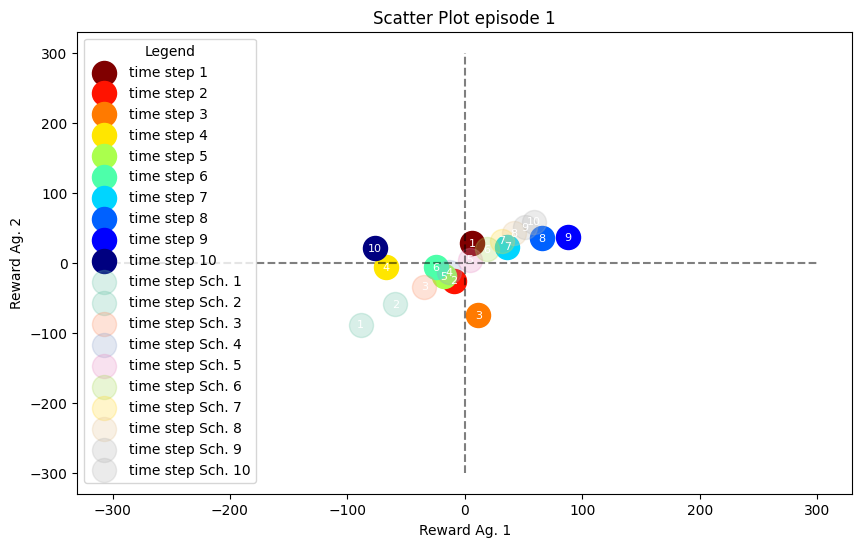

In [ ]:
'''Average rewards'''
re_tot = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy')
rewards_sch =  (np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy', allow_pickle=True))

rewards_per_episode_1_solo(re_tot[:, 0].mean(0), re_tot[:, 1].mean(0), rewards_sch[:,0].mean(0),  rewards_sch[:,1].mean(0), 1)

In [ ]:
'''Selling Schedules'''

def make_selling_schedule(a, azioni, T, i=0, inv=100):
    azioni_tot_1 = azioni[i, 0]
    azioni_tot_2 = azioni[i, 1]
    agent_1 = azioni_tot_1.mean(axis=1)
    agent_2 = azioni_tot_2.mean(axis=1)
    
    q0_1 = np.zeros(T + 1)
    q0_1[0] = inv
    for j in range(1, T):
        q0_1[j] = q0_1[j - 1] - agent_1[j - 1]
    q0_2 = np.zeros(T + 1)
    q0_2[0] = inv
    for j in range(1, T):
        q0_2[j] = q0_2[j - 1] - agent_2[j - 1]
    q_tot = inv# * 2
    azioni_t = (agent_1 + agent_2) / 2
    qt = np.zeros(T + 1)
    qt[0] = q_tot
    for j in range(1, T):
        qt[j] = qt[j - 1] - azioni_t[j - 1]

    azioni_tw = np.ones((5_000,10)) * 10
    twat = azioni_tw.reshape(-1,10).mean(0)
    twap = np.zeros(11) 
    twap[0] = 100
    for i in range(1,10):
        twap[i] =  twap[i - 1] - twat[i - 1]

    b = np.asarray(a) / 2

    ax.plot(q0_1, label='Agent 1' if i == 0 else None)
    ax.plot(q0_2, label='Agent 2' if i == 0 else None)
    ax.plot(qt, alpha = 0.5, label='Mean Agents' if i == 0 else None, linestyle='--')
    ax.plot(b, label='Nash Agent'if i == 0 else None, linestyle=':')
    ax.plot(twap, label = 'twap' if i == 0 else None, linestyle='-.')

def do_is(i, dati, azioni, alpha=0.002):
    dati =      dati[i,:,0]
    azioni1 =  azioni[i, 0]
    azioni2 =  azioni[i, 0]
    azioni = (azioni1 + azioni2)
    iss = []

    for i in range(dati.reshape(-1,T).shape[0]):
        iss.append((dati.reshape(-1,T)[i])* azioni[:,i] - alpha * azioni[:,i]**2)

    agents = np.sum((np.asarray(iss)),axis=1)
    agents_std = np.sum((np.asarray(iss)),axis=1).std()

    return 2000-remove_outliers(agents).mean(),  agents_std


# Load data
azioni_tot = np.load('C:/Users/macri/Desktop/ennesima/azioni_tot.npy', allow_pickle=True)
dati =       np.load('C:/Users/macri/Desktop/ennesima/dati_tot.npy', allow_pickle=True)
T = len(azioni_tot[0, 0])

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))

# Plot each selling schedule
for i, ax in enumerate(axs.flat):
    make_selling_schedule(a, azioni_tot, T, i, 100)
    ax.set_title(f"Simulation {i}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Inventory')
    IS, IS_std = do_is(i, dati, azioni_tot, alpha = 0.002)
    #ax.text(0.5, -0.5, f'ave. IS agents: {IS:.2f}, std:{IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
    #ax.text(0.5, -0.7, f'std. IS agents: {IS_std:.2f}', ha='center', va='center', transform=ax.transAxes)
     
fig.suptitle('Selling schedules for Constrained Agents over 10 simulations')

# Add legend to last subplot
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), title='Legend:')

# Adjust layout
#fig.text(0.5, 0.01, f'The simulated theoretical average IS is: {27.31:.2f}, the simulated theoretical std. dev. IS is: {0.0025:.4f}', ha='center')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/azioni_tot.npy'

In [ ]:
dati =       np.load('C:/Users/macri/Desktop/ennesima/dati_tot.npy', allow_pickle=True)
dati.shape

(2, 5000, 2)

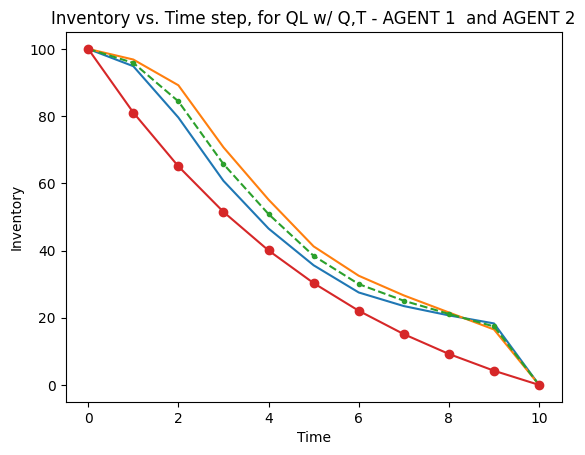

In [ ]:
'''Avergae schedule'''
agente_0, agente_1, agente_medio = process_data('C:/Users/macri/Desktop/10_molta_vol_0_01/azioni_tot.npy')

plt.plot(agente_0)
plt.plot(agente_1)
plt.plot((agente_0 +agente_1)/2, '.--')
b = np.asarray(a)/2
plt.plot(b,'o-')
plt.ylabel('Inventory')
plt.xlabel('Time')
plt.title('Inventory vs. Time step, for QL w/ Q,T - AGENT 1  and AGENT 2')
plt.show()

t- test per le medie per vedere se le medie sono diverse, fra 1 e 2 ma anche fra gli agenti ed i teorici 

fallo 10 volte per tutti e due i sigma

lo spazio dei reward è un continuo? ho due soli equilibri 9 o 10 o ne ho diversi?


randomizzare chi dei due agisce prima

In [ ]:
'''Rewards histograms per simulation'''
plot_rewards('C:/Users/macri/Desktop/ennesima/re_tot.npy', 'C:/Users/macri/Desktop/ennesima/re_tot.npy', 'C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy', 'C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy' ,  'C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy')
#train_10_batch_32

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/re_tot.npy'

In [ ]:
np.random.binomial(10, 0.5, 1)[0]

4

''

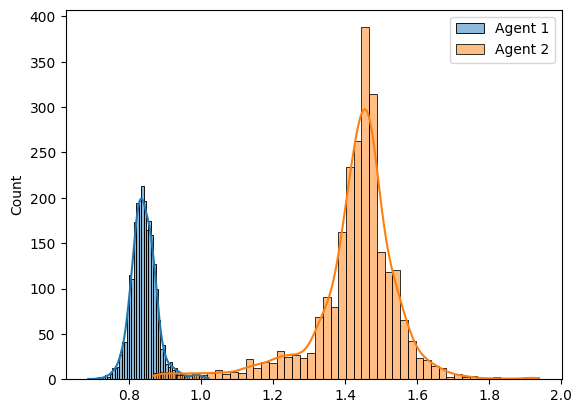

In [ ]:
rewards = np.load('C:/Users/macri/Desktop/ennesima/re.npz', allow_pickle=True)
rewards_0 = rewards['arr_0'][0].mean(0)
rewards_1 = rewards['arr_0'][1].mean(0)
sns.histplot(remove_outliers(rewards_0), bins=50, alpha=0.5, label='Agent 1',kde=True)
sns.histplot(remove_outliers(rewards_1), bins=50, alpha=0.5, label='Agent 2',kde=True)
plt.legend()
;

In [ ]:
rewards = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
rewards_0 = rewards[:, 0]
rewards_1 = rewards[:, 1]
sns.histplot(remove_outliers(rewards_0.mean(1).mean(0)), bins=50, alpha=0.5, label='Agent 1',kde=True)
sns.histplot(remove_outliers(rewards_1.mean(1).mean(0)), bins=50, alpha=0.5, label='Agent 2',kde=True)
ax.vlines(rewards_0.mean(0).mean(0)+rewards_1.mean(0).mean(0), 0, 0.5, color='blue', label='Agent 1')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/re_tot.npy'

In [ ]:
for i in range(10):
    sns.histplot(remove_outliers(rewards[i, 0].flatten())/10, bins=50, alpha=0.5,kde=True, label=f' agent 1 {i}')
    sns.histplot(remove_outliers(rewards[i, 1].flatten())/10, bins=50, alpha=0.5,kde=True, label=f'agent 2 {i}')
    plt.legend()
    plt.axvline(np.mean((rewards[i, 0].flatten())+(rewards[i, 1].flatten())), color='blue', linestyle='dashed', linewidth=1)
    ;

KeyError: '(0, 0) is not a file in the archive'

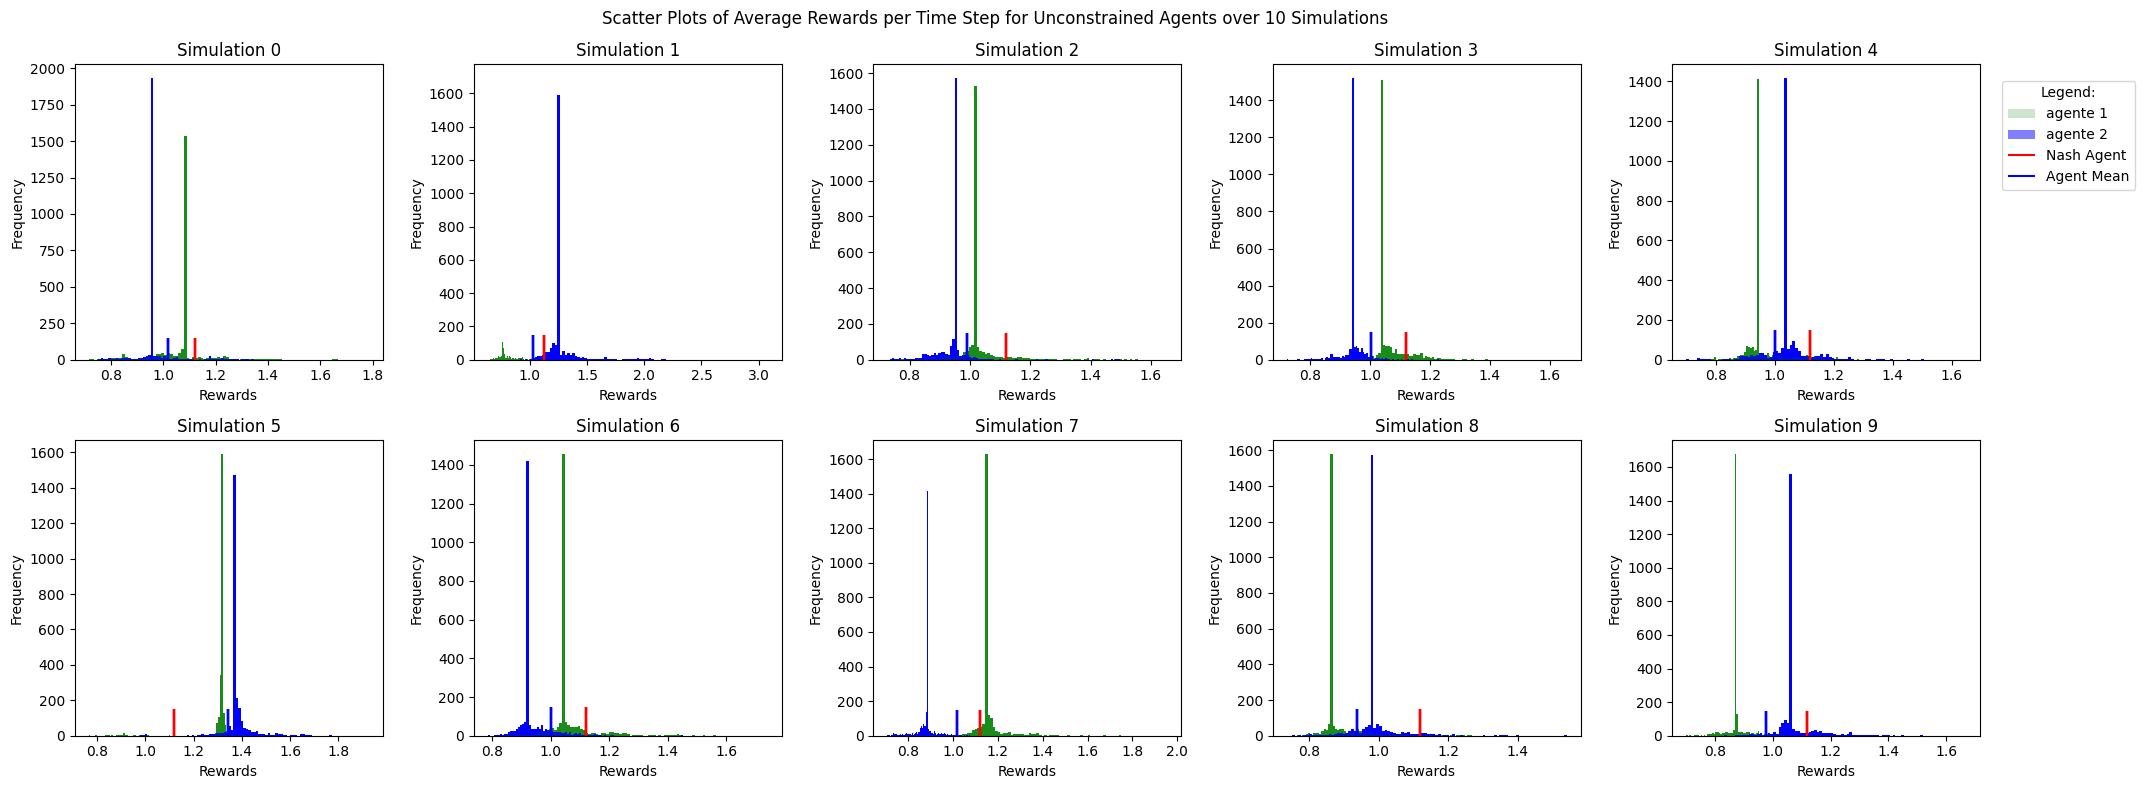

In [ ]:
def rewards_per_simulation_hist(re_tot, rewards_sch):

    #rewards_sch_0 = rewards_sch[:, 0]
    #rewards_sch_1 = rewards_sch[:, 1]



    # Assuming re_tot, rewards_0, rewards_1, and rewards_sch_0 have been defined earlier

    fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns

    colors = plt.cm.jet_r(np.linspace(0, 1, re_tot.shape[2]))  # Different colormap for rewards_0
    colors_sch = plt.cm.Set2(np.linspace(0, 1, len(rewards_sch[:, 0])))

    for simu in range(min(re_tot.shape[0], 10)):  # Iterate over simulation steps, limited to 10
        row = simu // 5  # Determine the row index
        col = simu % 5  # Determine the column index
        ax = axs[row, col]
        for j in range(re_tot.shape[2]):  # Iterate over the simulation steps
            # Accessing individual elements of re_tot[simu, 0, j] and re_tot[simu, 1, j]
            ax.hist(re_tot[simu, 0].mean(0).flatten(), bins=100, alpha = 0.2, color = 'green', label= f'agente 1' if j == 0 else None)
            ax.hist(re_tot[simu, 1].mean(0).flatten(), bins=100, alpha = 0.5, color = 'blue' , label= f'agente 2' if j == 0 else None)
            ax.vlines(1.12, 0, 150, color = 'red', label = 'Nash Agent'if j == 0 else None)
            ax.set_title(f"Simulation {simu}")
            ax.set_xlabel('Rewards')
            ax.set_ylabel('Frequency')
            ax.vlines((re_tot[simu, 0].mean(0).mean(0)+re_tot[simu, 1].mean(0).mean(0))/2, 0, 150, color='blue', label='Agent Mean' if j == 0 else None)


        # Calculate correlation coefficient
        #corr_coef = np.corrcoef(re_tot[simu, 0, :, -1], re_tot[simu, 1, :, -1])[0, 1]
        # Print correlation coefficient below the plot
        #ax.text(0.5, -0.2, f'Correlation Coefficient: {corr_coef:.2f}', ha='center', va='center', transform=ax.transAxes)


    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.9), title='Legend:')
    fig.suptitle('Scatter Plots of Average Rewards per Time Step for Unconstrained Agents over 10 Simulations')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

rewards = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
rewards_per_simulation_hist(rewards, rewards_sch)

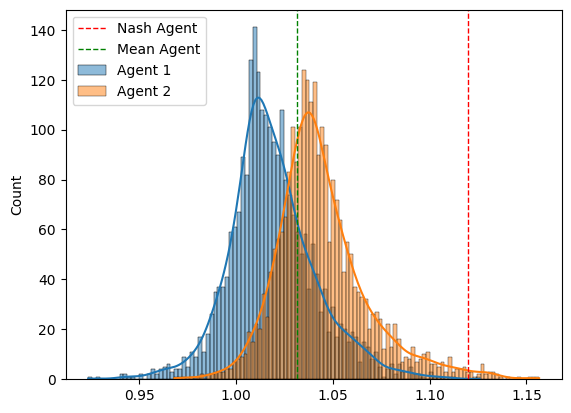

In [ ]:
rewards = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
sns.histplot(remove_outliers(rewards[:,0].mean(0).mean(0).flatten()), bins = 100, kde=True, label='Agent 1')
sns.histplot(remove_outliers(rewards[:,1].mean(0).mean(0).flatten()), bins = 100, kde=True, label='Agent 2')
plt.axvline(1.12, color='red', linestyle='dashed', linewidth=1, label='Nash Agent')
plt.axvline(remove_outliers(rewards[:,0].mean(0).mean(0).flatten() + rewards[:,1].mean(0).mean(0).flatten()).mean()/2, color='green', linestyle='dashed', linewidth=1, label='Mean Agent')
plt.legend();

In [ ]:
rewards_2 = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/re_tot.npy', allow_pickle=True)
rewards_1 = np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/re_tot.npy', allow_pickle=True)
rewards_0 = np.load('C:/Users/macri/Desktop/ennesima/re_tot.npy', allow_pickle=True)
rewards_3 = np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/re_tot.npy', allow_pickle=True)
rewards_4 = np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy', allow_pickle=True)*0+1.122

sns.histplot((rewards_1[:,0].mean(axis=0).mean(axis=0))+ (rewards_1[:,1].mean(axis=0).mean(axis=0)), alpha = 0.3, bins = 30, kde=True, label = '0.01');
sns.histplot((rewards_2[:,0].mean(axis=0).mean(axis=0))+ (rewards_2[:,1].mean(axis=0).mean(axis=0)), alpha = 0.5, bins = 20, kde=True, label = '0.001');
sns.histplot((rewards_0[:,0].mean(axis=0).mean(axis=0))+ (rewards_0[:,1].mean(axis=0).mean(axis=0)), alpha = 0.7, bins = 30, kde=True, label = '0');
sns.histplot((rewards_3[:,0].mean(axis=0).mean(axis=0))+ (rewards_3[:,1].mean(axis=0).mean(axis=0)), alpha = 0.9, bins = 30, kde=True, label = '0.0001');
plt.axvline(1.122*2, color='r', linestyle='dashed', linewidth=1, label='Nash');
c = ((rewards_1[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_1[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_2[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0[:,1].mean(axis=0).mean(axis=0)).mean()
+ (rewards_3[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3[:,1].mean(axis=0).mean(axis=0)).mean())/4
plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/macri/Desktop/ennesima/re_tot.npy'

In [ ]:
from scipy import stats
stats.ttest_ind(rewards[:,1].mean(1).mean(1).flatten(), rewards[:,0].mean(1).mean(1).flatten(), equal_var=False)

KeyError: '(slice(None, None, None), 1) is not a file in the archive'

In [ ]:
stats.ttest_ind(rewards_1[:, 0].mean(1).mean(0), rewards_1[:, 1].mean(1).mean(0), equal_var=False)

Ttest_indResult(statistic=-10.851936226836932, pvalue=2.7749800237392345e-27)

In [ ]:
stats.ttest_ind(rewards_2[:, 0].mean(1).mean(0), rewards_2[:, 1].mean(1).mean(0), equal_var=False)

Ttest_indResult(statistic=320.4377083958549, pvalue=0.0)

In [ ]:
stats.ttest_ind(rewards_4[:, 0].mean(1).mean(0), rewards_4[:, 1].mean(1).mean(0), equal_var=False)

C:\Users\macri\AppData\Local\Temp\ipykernel_11680\905418933.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(rewards_4[:, 0].mean(1).mean(0), rewards_4[:, 1].mean(1).mean(0), equal_var=False)


Ttest_indResult(statistic=nan, pvalue=nan)

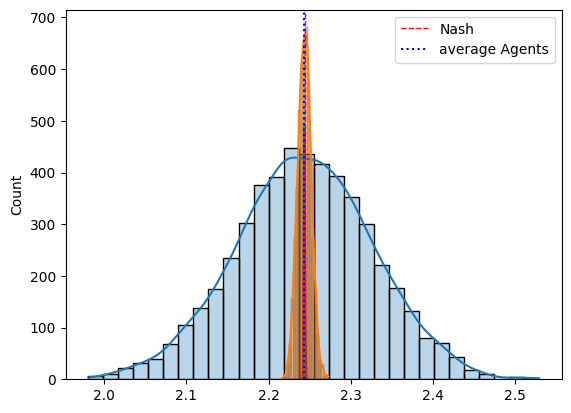

IS mean via rewards for RL agents : 1.12, std: 0.00000
IS mean via rewards for RL agents : 1.12, std: 0.25997
IS mean via rewards for RL agents : 1.12, std: 0.02589
IS mean via rewards for RL agents : 1.12, std: 0.00260


In [ ]:
rewards_2_nash = np.load('C:/Users/macri/Desktop/10_media_vol_0_001/nash/re_tot.npy', allow_pickle=True)
rewards_1_nash = np.load('C:/Users/macri/Desktop/10_molta_vol_0_01/nash/re_tot.npy', allow_pickle=True)
rewards_0_nash = np.load('C:/Users/macri/Desktop/10_zero_vol/nash/re_tot.npy', allow_pickle=True)
rewards_3_nash = np.load('C:/Users/macri/Desktop/10_bassa_vol_0_0001/nash/re_tot.npy', allow_pickle=True)

sns.histplot((rewards_1_nash[:,0].mean(axis=0).mean(axis=0))+ (rewards_1_nash[:,1].mean(axis=0).mean(axis=0)), alpha = 0.3, bins = 30, kde=True);
sns.histplot((rewards_2_nash[:,0].mean(axis=0).mean(axis=0))+ (rewards_2_nash[:,1].mean(axis=0).mean(axis=0)), alpha = 0.5, bins = 20, kde=True);
sns.histplot((rewards_0_nash[:,0].mean(axis=0).mean(axis=0))+ (rewards_0_nash[:,1].mean(axis=0).mean(axis=0)), alpha = 0.7, bins = 30, kde=True);
sns.histplot((rewards_3_nash[:,0].mean(axis=0).mean(axis=0))+ (rewards_3_nash[:,1].mean(axis=0).mean(axis=0)), alpha = 0.9, bins = 30, kde=True);
plt.axvline(1.122*2, color='r', linestyle='dashed', linewidth=1, label='Nash');
c = ((rewards_1_nash[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_1_nash[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_2_nash[:,0].mean(axis=0).mean(axis=0)).mean() 
    + (rewards_2_nash[:,1].mean(axis=0).mean(axis=0)).mean() + (rewards_0_nash[:,0].mean(axis=0).mean(axis=0)).mean() + (rewards_0_nash[:,1].mean(axis=0).mean(axis=0)).mean()
+ (rewards_3_nash[:,0].mean(axis=0).mean(axis=0)).mean()+ (rewards_3_nash[:,1].mean(axis=0).mean(axis=0)).mean())/4
plt.axvline(c, color='blue', linestyle= 'dotted', label = 'average Agents')
plt.legend()
plt.show()

print(f'IS mean via rewards for RL agents : {((rewards_0_nash[:,0].mean(axis=1).mean() + rewards_0_nash[:,1].mean(axis=1).mean())/2).item():.2f}, std: {((rewards_0_nash[:,0].mean(axis=1) + rewards_0_nash[:,1].mean(axis=1))).std():.5f}')
print(f'IS mean via rewards for RL agents : {((rewards_1_nash[:,0].mean(axis=1).mean() + rewards_1_nash[:,1].mean(axis=1).mean())/2).item():.2f}, std: {((rewards_1_nash[:,0].mean(axis=1) + rewards_1_nash[:,1].mean(axis=1))).std():.5f}')
print(f'IS mean via rewards for RL agents : {((rewards_2_nash[:,0].mean(axis=1).mean() + rewards_2_nash[:,1].mean(axis=1).mean())/2).item():.2f}, std: {((rewards_2_nash[:,0].mean(axis=1) + rewards_2_nash[:,1].mean(axis=1))).std():.5f}')
print(f'IS mean via rewards for RL agents : {((rewards_3_nash[:,0].mean(axis=1).mean() + rewards_3_nash[:,1].mean(axis=1).mean())/2).item():.2f}, std: {((rewards_3_nash[:,0].mean(axis=1) + rewards_3_nash[:,1].mean(axis=1))).std():.5f}')


In [ ]:
(rewards_1[:, 0].mean(1).mean(0)+rewards_1[:, 1].mean(1).mean(0)).shape


(5000,)

In [ ]:
(rewards_1_nash[:, 0].mean(1).mean(0)+rewards_1_nash[:, 1].mean(1).mean(0)).std()

0.08316515366318422

In [ ]:
(2.1595873598923916 - 2.1595873598923916 )/(np.sqrt((0.13535332690189816**2/5000 + 0.08316515366318422**2/5000)))

0.0

In [ ]:
a = np.zeros((10001, 2))
for i in range (10001):
    a[i, ...] = np.random.permutation(2)

a.mean(axis=0)

array([0.50624938, 0.49375062])

In [ ]:
np.random.permutation(2).type


AttributeError: 'numpy.ndarray' object has no attribute 'type'